# Projet 02 du parcours data scientist de Openclassrooms

## Analysez des données de systèmes éducatifs

### objectifs 

### Plan

### I-Mise en place 

In [136]:
pip install pygal_maps_world

  Created wheel for pygal-maps-world: filename=pygal_maps_world-1.0.2-py3-none-any.whl size=278561 sha256=ece3f38e481e0c662a576e7edb3462ab0a0f3c00ecaf61b3d7379a12a4d1c50f
  Stored in directory: c:\users\archi\appdata\local\pip\cache\wheels\f8\ff\bd\a3cb8647e19834039de7bfd2f9304e06d3314f87c135cb8b1a
Successfully built pygal-maps-world
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

import pygal_maps_world as pmw

import re

import math

import itertools

#import folium
#import geopandas


#display all columns of dataframes
pd.set_option("display.max_columns", None)


###  II-La donnée brute

In [4]:
#Import et lecture des données (fichiers de type csv)
country_df = pd.read_csv('datasets/EdStatsCountry.csv')               #Tableau 1
country_series_df = pd.read_csv('datasets/EdStatsCountry_Series.csv') #Tableau 2
data_df = pd.read_csv('datasets/EdStatsData.csv')                     #Tableau 3
footnote_df = pd.read_csv('datasets/EdStatsFootNote.csv')             #Tableau 4
series_df = pd.read_csv('datasets/EdStatsSeries.csv')                 #Tableau 5

In [5]:
#Creation de dataframes copies qui serviront pour l'analyse et conserver les dataframes originels
#Utilisé la fonction dropna (colonne nulle) pour éliminer les colonnes fantômes "Unamed" en fin de tableau

country_df_c = country_df.dropna(how = 'all', axis = 'columns').copy()
country_series_df_c = country_series_df.dropna(how = 'all', axis = 'columns').copy()
data_df_c = data_df.dropna(how = 'all', axis = 'columns').copy()
footnote_df_c = footnote_df.dropna(how = 'all', axis = 'columns').copy()
series_df_c = series_df.dropna(how = 'all', axis = 'columns').copy()

In [5]:
country_df_c.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000


### III-Visualisation et analyse

### III-1-Tableau 1

In [6]:
country_df.shape #donne tuple avec 2 valeurs

(241, 32)

In [7]:
print(f'coutry_df contient {country_df.shape[0]} lignes et {country_df.shape[1]} colonnes')

coutry_df contient 241 lignes et 32 colonnes


In [8]:
country_df.head(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,AE,2007,NaN,Value added at producer prices (VAP),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,2012,NaN,2011.0,2005,NaN
7,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,2004,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1971–84,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS

In [9]:
country_df.tail()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,2008,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,NaN,NaN,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,2007,NaN,Value added at producer prices (VAP),IDA,NaN,Country uses the 1993 System of National Accou...,1990–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,2005,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Preliminary,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,1994,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1968 System of National Accou...,1990–92,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN
240,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,2009,NaN,Value added at basic prices (VAB),Blend,NaN,Country uses the 1993 System of National Accou...,"1991, 1998",2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN


In [10]:
country_df['Special Notes']

0      SNA data for 2000-2011 are updated from offici...
1      Fiscal year end: March 20; reporting period fo...
2      April 2013 database update: Based on IMF data,...
3                                                    NaN
4                                                    NaN
                             ...                        
236    Kosovo became a World Bank member on June 29, ...
237    Based on official government statistics and In...
238    Fiscal year end: March 31; reporting period fo...
239    National accounts data have rebased to reflect...
240    Fiscal year end: June 30; reporting period for...
Name: Special Notes, Length: 241, dtype: object

In [11]:
country_df.sample(10) #le tableau comporte des dates

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
8,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2010","Integrated household survey (IHS), 2012",Yes,2013/14,NaN,2012.0,2007,NaN
22,BIH,Bosnia and Herzegovina,Bosnia and Herzegovina,Bosnia and Herzegovina,BA,Bosnia and Herzegovina convertible mark,NaN,Europe & Central Asia,Upper middle income,BA,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,General Data Dissemination System (GDDS),2013,"Multiple Indicator Cluster Survey (MICS), 2011/12",Living Standards Measurement Study Survey (LSM...,Yes,NaN,NaN,2012.0,2009,NaN
14,BDI,Burundi,Burundi,Republic of Burundi,BI,Burundi franc,NaN,Sub-Saharan Africa,Low income,BI,2005,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,General Data Dissemination System (GDDS),2008,"Malaria Indicator Survey (MIS), 2012",Core Welfare Indicator Questionnaire Survey (C...,NaN,NaN,NaN,2012.0,2000,NaN
146,MLT,Malta,Malta,Republic of Malta,MT,Euro,A simple multiplier is used to convert the nat...,Middle East & North Africa,High income: nonOECD,MT,2005,NaN,Value added at basic prices (VAB),NaN,Euro area,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,NaN,Yes,2010,2008.0,2012.0,2002,NaN
125,LIE,Liechtenstein,Liechtenstein,Principality of Liechtenstein,LI,Swiss franc,NaN,Europe & Central Asia,High income: nonOECD,LI,1990,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
129,LSO,Lesotho,Lesotho,Kingdom of Lesotho,LS,Lesotho loti,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Lower middle income,LS,2004,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2006,"Demographic and Health Survey (DHS), 2009","Expenditure survey/budget survey (ES/BS), 2002/03",NaN,2010,NaN,2009.0,2000,NaN
49,CYP,Cyprus,Cyprus,Republic of Cyprus,CY,Euro,A simple multiplier is used to convert the nat...,Europe & Central Asia,High income: nonOECD,CY,Original chained constant price data are resca...,2000.0,Value added at basic prices (VAB),NaN,Euro area,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General tra

In [12]:
country_df.info() #infos sur le type des valeurs pour chaque colonne
#faire attention aux dates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [13]:
country_df.dtypes #apporte moins d'informations que la précédente

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [14]:
country_df.describe() #statistique descriptive

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


In [15]:
country_df.describe(include=['O'])

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest water withdrawal data
count,241,241,241,241,238,215,145,214,214,240,205,197,144,58,215,47,145,181,124,200,161,181,213,141,160,111,142,179
unique,241,241,241,241,238,152,131,7,5,240,43,2,3,2,3,32,3,1,3,2,2,2,27,60,75,2,35,20
top,ABW,Aruba,Aruba,Aruba,AW,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,AW,2005,Value added at basic prices (VAB),IBRD,HIPC,Country uses the 1993 System of National Accou...,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,2000
freq,1,1,1,1,1,23,6,57,55,1,34,163,67,40,165,8,98,181,107,106,95,110,59,10,15,110,36,40


In [16]:
country_df.isna() #présence de valeurs manquantes

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,True,False,True,False,True,True,False,True,True,False,True,True,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,True,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,False,False,False,True,True,True,True,False,True,True,True,True,False,True,True,False,True,True,False,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,True,True,False,True,True,False,False,True,False,True,True,True,True,True,True
237,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True
238,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
239,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True


In [17]:
country_df.isna().sum() #quantification des valeurs manquantes

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [18]:
country_df.isna().mean()*100 #proportion des valeurs manquantes
#eliminer certaines colonnes avec Nan élevé ??

Country Code                                           0.000000
Short Name                                             0.000000
Table Name                                             0.000000
Long Name                                              0.000000
2-alpha code                                           1.244813
Currency Unit                                         10.788382
Special Notes                                         39.834025
Region                                                11.203320
Income Group                                          11.203320
WB-2 code                                              0.414938
National accounts base year                           14.937759
National accounts reference year                      86.721992
SNA price valuation                                   18.257261
Lending category                                      40.248963
Other groups                                          75.933610
System of National Accounts             

In [19]:
nb_nan = country_df.isna().mean()*100
nb_nan[nb_nan > 75]

National accounts reference year     86.721992
Other groups                         75.933610
Alternative conversion factor        80.497925
Unnamed: 31                         100.000000
dtype: float64

In [20]:
country_df.loc[country_df['National accounts reference year'].isnull(),:]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,2008,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,NaN,NaN,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,2007,NaN,Value added at producer prices (VAP),IDA,NaN,Country uses the 1993 System of National Accou...,1990–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,2005,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Prelimi

In [21]:
country_df.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [22]:
nb_na = country_df.isnull().sum()
nb_na[nb_na > 0]

2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                                       96
Balance of Payments Manual in use                     60
External debt Reporting status                       117
System of trade                                       41
Government Accounting concept  

In [23]:
country_df.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
236    False
237    False
238    False
239    False
240    False
Length: 241, dtype: bool

In [24]:
country_df.duplicated(keep=False).sum()

0

In [25]:
country_df.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [26]:
#country_df[''].value_counts()

<AxesSubplot:>

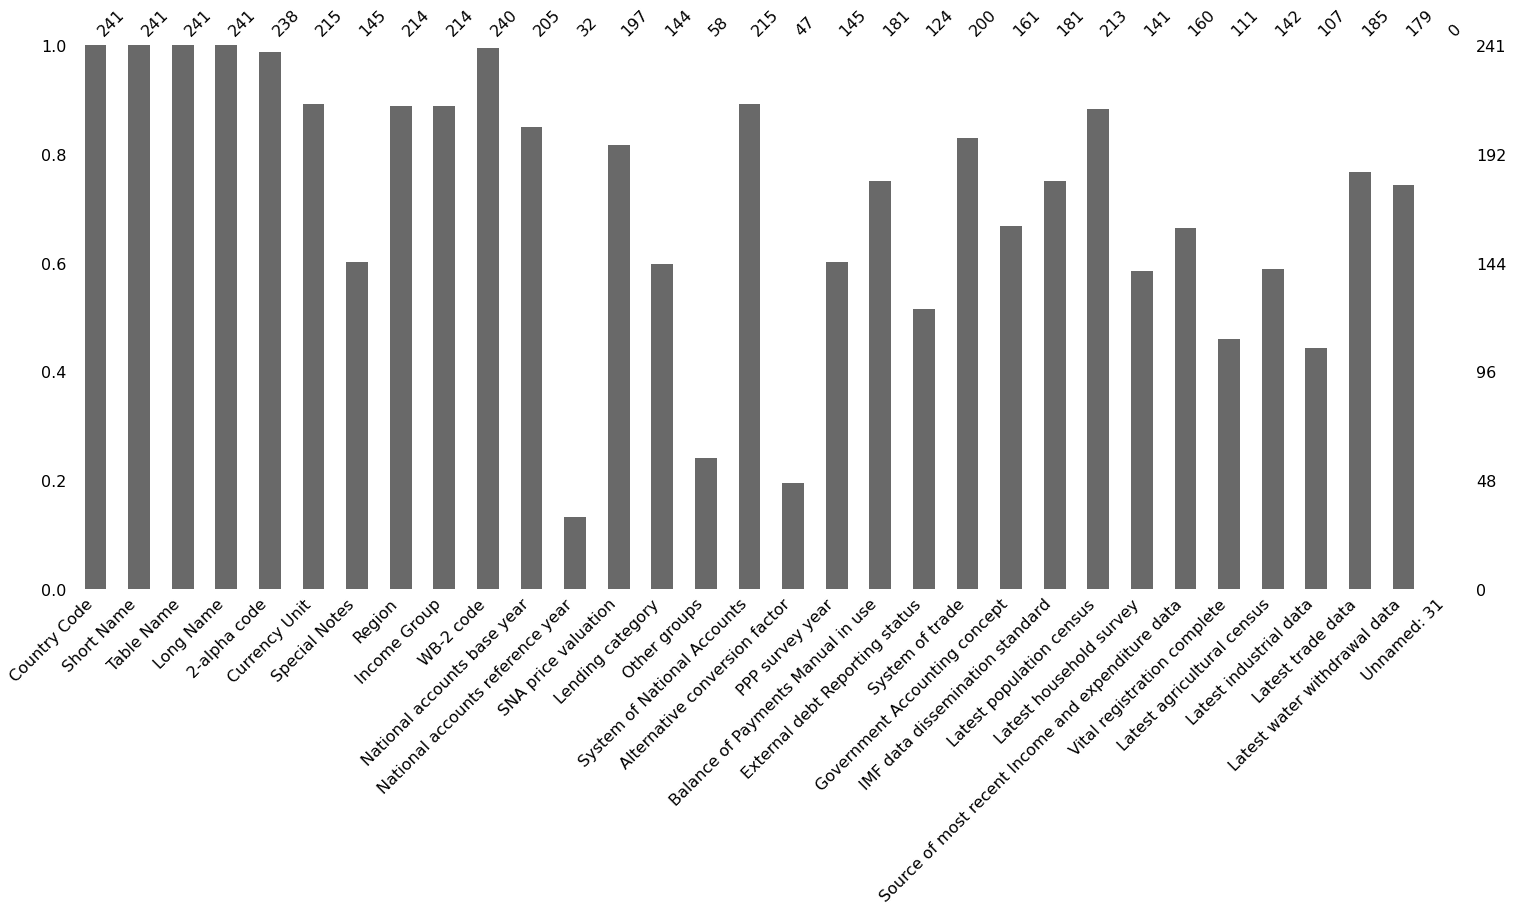

In [27]:
msn.bar(country_df) #visualisation des valeurs manquantes

In [28]:
country_df["Region"].value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

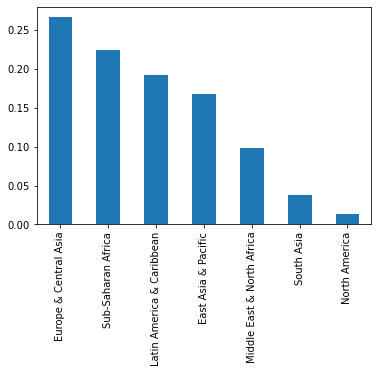

In [29]:
country_df["Region"].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [30]:
country_df.loc[country_df["Region"].value_counts()]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,CYM,Cayman Islands,Cayman Islands,Cayman Islands,KY,Cayman Islands dollar,NaN,Latin America & Caribbean,High income: nonOECD,KY,2007,NaN,NaN,NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,NaN,General trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
41,COG,Congo,"Congo, Rep.",Republic of Congo,CG,CFA franc,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Lower middle income,CG,1990,NaN,Value added at producer prices (VAP),Blend,HIPC,Country uses the 1968 System of National Accou...,1993,2005,"IMF Balance of Payments Manual, 6th edition.",Preliminary,Special trade system,Consolidated central government,General Data Dissemination System (GDDS),2007,"Demographic and Health Survey (DHS), 2011/12",Core Welfare Indicator Questionnaire Survey (C...,NaN,2013,2009.0,2010.0,2002,NaN
36,CHL,Chile,Chile,Republic of Chile,CL,Chilean peso,NaN,Latin America & Caribbean,High income: OECD,CL,2008,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2012,NaN,"Integrated household survey (IHS), 2011",Yes,2007,2008.0,2012.0,2007,NaN
21,BHS,The Bahamas,"Bahamas, The",Commonwealth of The Bahamas,BS,Bahamian dollar,NaN,Latin America & Caribbean,High income: nonOECD,BS,2006,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,NaN,NaN,2012.0,NaN,NaN
8,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2010","Integrated household survey (IHS), 2012",Yes,2013/14,NaN,2012.0,2007,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN


In [31]:
country_df["Region"].describe()

count                       214
unique                        7
top       Europe & Central Asia
freq                         57
Name: Region, dtype: object

In [32]:
country_df["Country Code"].describe()

count     241
unique    241
top       ABW
freq        1
Name: Country Code, dtype: object

### III-2-Tableau 2

In [33]:
print(f'country_series_df contient {country_series_df.shape[0]} lignes et {country_series_df.shape[1]} colonnes')

country_series_df contient 613 lignes et 4 colonnes


In [34]:
country_series_df.head(10)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
5,AFG,NY.GDP.MKTP.PP.KD,Estimates are based on regression.,NaN
6,AFG,NY.GNP.MKTP.PP.CD,Estimates are based on regression.,NaN
7,AFG,NY.GDP.MKTP.PP.CD,Estimates are based on regression.,NaN
8,AFG,NY.GDP.PCAP.PP.KD,Estimates are based on regression.,NaN
9,AFG,NY.GNP.PCAP.PP.CD,Estimates are based on regression.,NaN


In [35]:
country_series_df.sample(10)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
130,CZE,SP.POP.TOTL,Data sources : Eurostat,NaN
555,TUV,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
516,SYR,NY.GDP.MKTP.PP.KD,Estimates are based on regression.,NaN
45,BEL,SP.POP.GROW,Data sources : Eurostat,NaN
540,TLS,NY.GDP.PCAP.PP.KD,Estimates are based on regression.,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
152,ERI,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
291,LBY,NY.GDP.MKTP.PP.CD,Estimates are based on regression.,NaN
44,BEL,SP.POP.TOTL,Data sources : Eurostat,NaN
477,SMR,NY.GNP.PCAP.PP.CD,Estimates are based on regression.,NaN


In [36]:
country_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [37]:
country_series_df.isna().mean()*100

CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
Unnamed: 3     100.0
dtype: float64

In [38]:
country_series_df.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
608    False
609    False
610    False
611    False
612    False
Length: 613, dtype: bool

In [39]:
country_series_df.duplicated(keep=False).sum()

0

In [40]:
country_series_df.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

### III-3-Tableau 3

In [41]:
print(f'data_df contient {data_df.shape[0]} lignes et {data_df.shape[1]} colonnes')

data_df contient 886930 lignes et 70 colonnes


In [42]:
data_df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,60.999962,61.922680,62.693420,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.041870,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.811760,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,50.046188,51.245281,52.242321,54.754372,56.486790,57.314659,58.226051,59.289230,60.748180,61.520870,62.734951,64.115883,65.099663,65.129204,65.827492,66.797028,63.260429,63.972111,67.033043,65.761559,68.780800,69.267052,70.435387,72.047287,73.275620,75.132980,76.641022,77.653580,78.485397,79.475769,79.608330,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,0.699950,0.710140,0.718430,0.743740,0.759440,0.769250,0.779860,0.790710,0.799610,0.806770,0.816060,0.825130,0.834190,0.834760,0.844660,0.854320,0.826490,0.834080,0.859090,0.847310,0.872660,0.872690,0.884940,0.897370,0.904060,0.912750,0.919790,0.926300,0.927680,0.930840,0.929620,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,71.499512,72.162064,72.717690,73.619972,74.379982,74.507133,74.662628,74.981827,75.972542,76.255493,76.875053,77.703857,78.039368,78.021889,77.933853,78.187492,76.541100,76.697418,78.028130,77.611900,78.817490,79.372040,79.593536,80.287529,81.051369,82.315048,83.324059,83.832

In [43]:
data_df.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
490285,Latvia,LVA,SABER: (Tertiary Education) Policy Goal 6 Leve...,SABER.TER.GOAL6.LVL3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231123,Chad,TCD,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.5054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219175,Cameroon,CMR,"School life expectancy, tertiary, female (years)",UIS.SLE.56.F,NaN,0.00358,0.00534,0.00834,0.01011,0.01393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.196550,0.19796,0.196740,0.230070,0.319680,0.368190,0.345370,0.47566,0.49464,0.50484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522079,"Macedonia, FYR",MKD,"Net enrolment rate, pre-primary, male (%)",SE.PRE.NENR.MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.996920,27.0058,27.838869,27.110340,27.87851,28.821461,29.714800,32.520458,35.043419,20.120840,20.95575,22.77821,23.17658,24.961161,27.684521,29.788361,30.988371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394929,Guyana,GUY,SABER: (School Health and School Feeding) Poli...,SABER.HLTH.GOAL3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139994,"Bahamas, The",BHS,EGRA: Correct Isolated Words Read Per Minute (...,LO.EGRA.CWPM.FLF.2GRD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624711,Northern Mariana Islands,MNP,Net flow of internationally mobile students (i...,UIS.MENF.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370439,Greenland,GRL,Barro-Lee: Percentage of female population age...,BAR.TER.CMPT.15UP.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119111,Argentina,ARG,PASEC: Mean performance on the mathematics sca...,LO.PASEC.MAT.6.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225526,Cayman Islands,CYM,Percentage of new entrants to Grade 1 of prima...,UIS.ECDP.1.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.950821,90.0000,94.214882,87.030724,NaN,90.000000,93

In [44]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [45]:
data_df.isna().mean()*100

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
                     ...    
2085               94.200670
2090               94.200670
2095               94.200670
2100               94.200670
Unnamed: 69       100.000000
Length: 70, dtype: float64

In [46]:
nb_nan = data_df.isna().mean()*100
nb_nan[nb_nan > 75]

1970            91.849639
1971            95.993258
1972            95.984012
1973            95.992356
1974            95.971497
                  ...    
2085            94.200670
2090            94.200670
2095            94.200670
2100            94.200670
Unnamed: 69    100.000000
Length: 65, dtype: float64

In [47]:
data_df.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
886925    False
886926    False
886927    False
886928    False
886929    False
Length: 886930, dtype: bool

In [48]:
data_df.duplicated(keep=False).sum()

0

In [49]:
data_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

<AxesSubplot:>

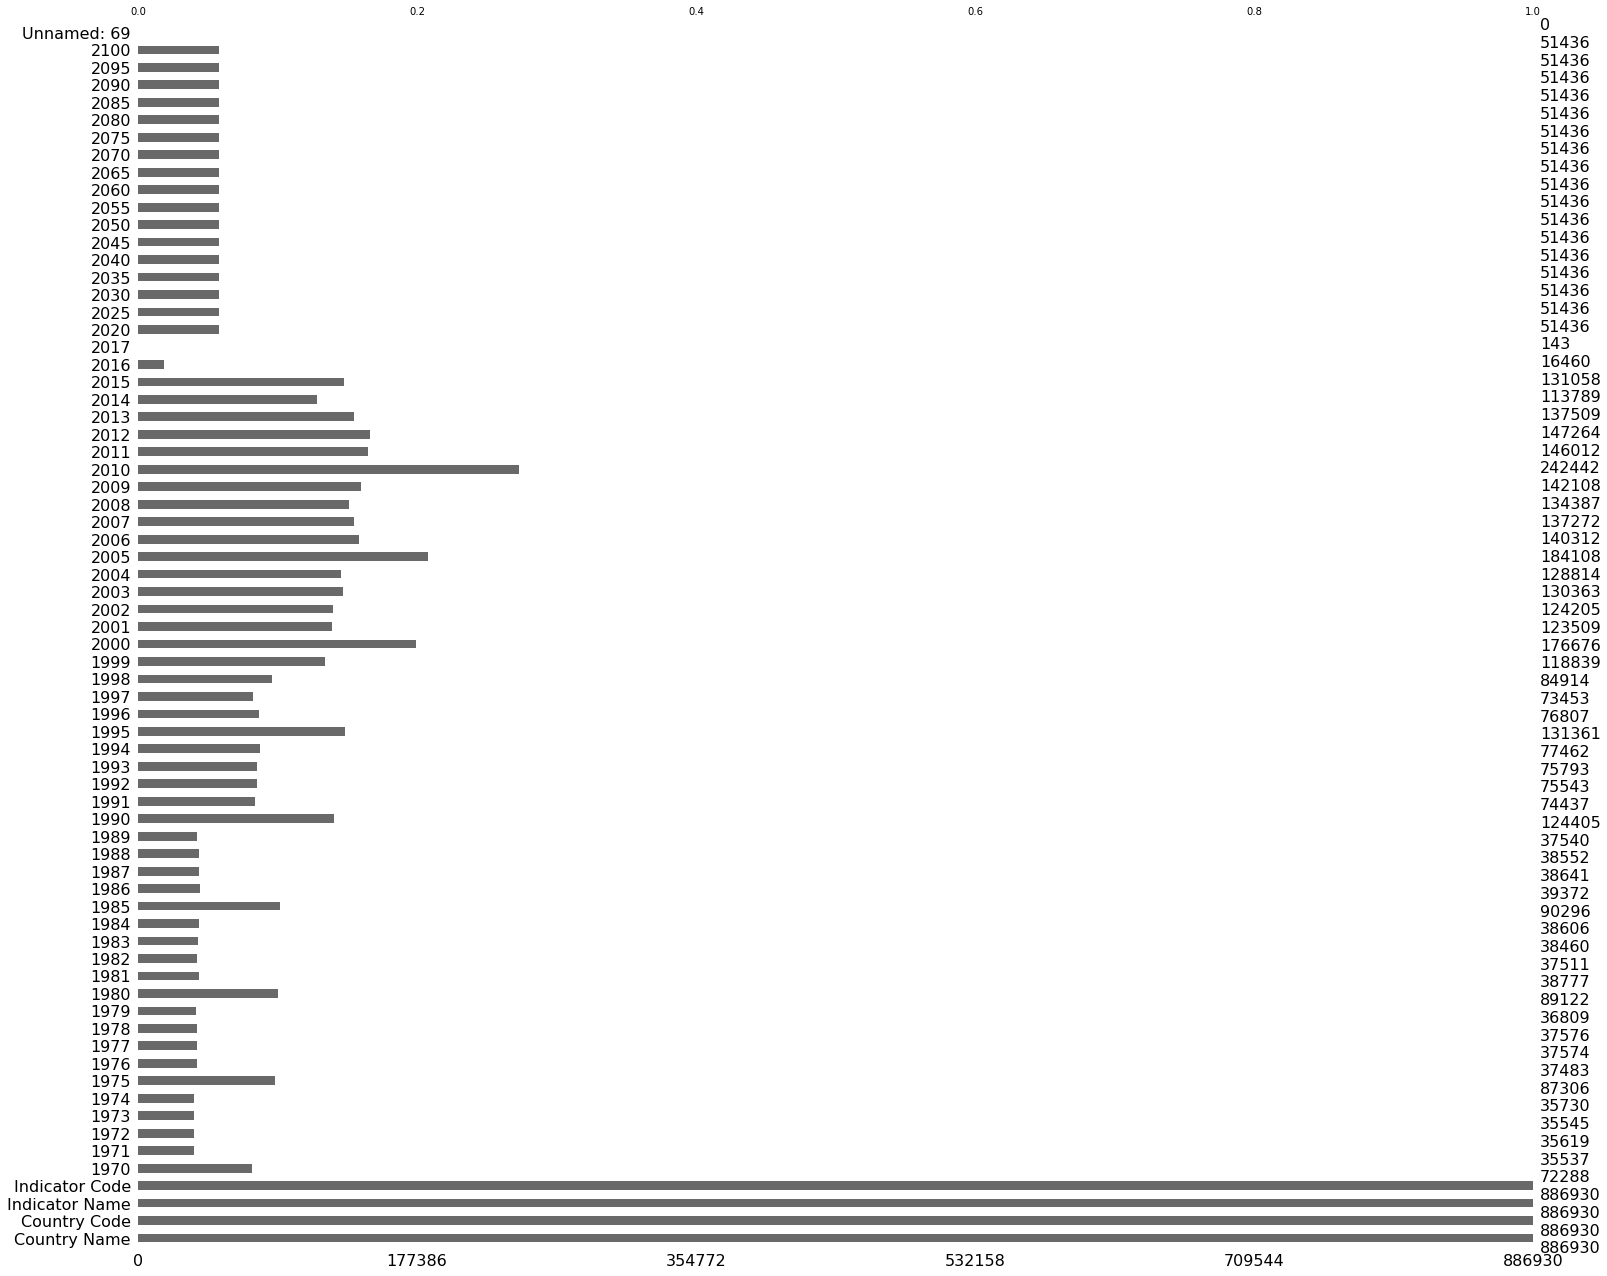

In [50]:
msn.bar(data_df)

### III-4-Tableau 4

In [51]:
print(f'footnote_df contient {footnote_df.shape[0]} lignes et {footnote_df.shape[1]} colonnes')

footnote_df contient 643638 lignes et 5 colonnes


In [52]:
footnote_df.head(10)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
5,ABW,SE.PRE.NENR,YR2000,Country estimation.,NaN
6,ABW,SE.SEC.ENRL.VO.FE,YR2005,Country estimation.,NaN
7,ABW,SE.SEC.ENRL.GC,YR2003,Country estimation.,NaN
8,ABW,SE.PRM.TCHR.FE,YR1999,Country estimation.,NaN
9,ABW,SE.PRE.TCHR.FE.ZS,YR2008,Country estimation.,NaN


In [53]:
footnote_df.sample(10)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
87291,CAN,SE.SEC.ENRR.MA,YR1987,Country Data,NaN
79172,BTN,SE.PRM.AGES,YR1991,Country Data,NaN
317667,LBN,SE.TER.GRAD.HL.FE.ZS,YR2005,Estimated,NaN
435324,MWI,SE.PRM.PRS5.FE.ZS,YR2008,Estimated,NaN
406188,MKD,SE.SCH.LIFE.MA,YR2005,Estimated,NaN
302760,KWT,SE.ENR.PRSC.FM.ZS,YR1978,Country Data,NaN
473083,OMN,SE.SEC.ENRR,YR1988,Country Data,NaN
539795,SSA,UIS.OFST.2.M,YR2000,UNESCO Institute for Statistics (UIS) estimate,NaN
198817,FRA,UIS.MS.56.T,YR2013,Country Data,NaN
120190,CUB,SE.SEC.ENRR,YR2008,Estimated,NaN


In [54]:
footnote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [55]:
footnote_df.isna().mean()*100

CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
Unnamed: 4     100.0
dtype: float64

In [56]:
footnote_df.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
643633    False
643634    False
643635    False
643636    False
643637    False
Length: 643638, dtype: bool

In [57]:
footnote_df.duplicated(keep=False).sum()

0

In [58]:
footnote_df.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

### III-5-Tableau 5

In [59]:
print(f'series_df contient {series_df.shape[0]} lignes et {series_df.shape[1]} colonnes')

series_df contient 3665 lignes et 21 colonnes


In [60]:
series_df.head(10)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BAR.NOED.2024.ZS,Attainment,Barro-Lee: Percentage of population age 20-24 ...,Percentage of population age 20-24 with no edu...,Percentage of population age 20-24 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BAR.NOED.2529.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 25-29 with...,Percentage of female population age 25-29 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BAR.NOED.2529.ZS,Attainment,Barro-Lee: Percentage of population age 25-29 ...,Percentage of population age 25-29 with no edu...,Percentage of population age 25-29 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BAR.NOED.25UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 25+ with n...,Percentage of female population age 25+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BAR.NOED.25UP.ZS,Attainment,Barro-Lee: Percentage of population age 25+ wi...,Percentage of population age 25+ with no educa...,Percentage of population age 25+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
series_df.sample(10)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1175,LO.PASEC.MAT.2.P10,Learning Outcomes,PASEC: Distribution of 2nd grade mathematics s...,The 10th percentile score is the score below w...,The 10th percentile score is the score below w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Programme d'Analyse des Systèmes Educatifs de ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3537,UIS.TEP.5.B.F,Tertiary,Percentage of female students in tertiary educ...,NaN,Total female enrolment in short-cycle tertiary...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2871,UIS.EA.4.AG25T99.F,Attainment,UIS: Percentage of population age 25+ with com...,The percentage of female population (age 25 an...,The percentage of female population (age 25 an...,NaN,NaN,NaN,Single Level Attainment/ Not Cumulative,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,LO.EGRA.CWPM.ZERO.SOM.3GRD,Learning Outcomes,EGRA: Oral Reading Fluency - Share of students...,Percentage of students who were unable to read...,Percentage of students who were unable to read...,NaN,NaN,NaN,EGRA,NaN,NaN,NaN,NaN,Early Grade Reading Assessment (EGRA): https:/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2956,UIS.FOSEP.56.F140,Tertiary,Percentage of students in tertiary education e...,NaN,Percentage of all tertiary students who are en...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,LO.PIAAC.NUM.P05,Learning Outcomes,PIAAC: Distribution of Adult Numeracy Scores: ...,The 5th percentile score is the score below wh...,The 5th percentile score is the score below wh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OECD Programme for the International Assessmen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2605,SP.SEC.LTOT.IN,Population,Population of the official age for lower secon...,NaN,Population of the age-group theoretically corr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,LO.PISA.REA.5.MA,Learning Outcomes,PISA: Male 15-year-olds by reading proficiency...,Percentage of 15-year-old male students scorin...,Percentage of 15-year-old male students scorin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OECD Programme for International Student Asses...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,PRJ.ATT.2529.4.FE,Attainment,Projection: Percentage of the population age 2...,NaN,Share of the population of the stated age grou...,NaN,NaN,Projections (2010 to 2100),NaN,NaN,NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
787,LO.EGRA.LSTN.0.GON.2GRD,Learning Outcomes,EGRA: Listening Comprehension - Share of stude...,Share of students scoring zero percent on the ...,Share of students scoring zero percent on the ...,NaN,NaN,NaN,EGRA,NaN,NaN,NaN,NaN,Early Grade Reading Assessment (EGRA): https:/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [63]:
series_df.isna().mean()*100

Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Short definition                        41.173261
Long definition                          0.000000
Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Source                                   0.000000
Statistical concept and methodology     99.372442
Development relevance                   99.918145
Related source links                    94.133697
Other web links                        100.000000
Related indicators                     100.000000
License Type                           100.000000


In [4]:
series_df.notna()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,True,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3661,True,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3662,True,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3663,True,True,True,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False


In [64]:
nb_nan = series_df.isna().mean()*100
nb_nan[nb_nan > 75]

Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Statistical concept and methodology     99.372442
Development relevance                   99.918145
Related source links                    94.133697
Other web links                        100.000000
Related indicators                     100.000000
License Type                           100.000000
Unnamed: 20                            100.000000
dtype: float64

In [65]:
series_df.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
3660    False
3661    False
3662    False
3663    False
3664    False
Length: 3665, dtype: bool

In [66]:
series_df.duplicated(keep=False).sum()

0

In [67]:
series_df.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

<AxesSubplot:>

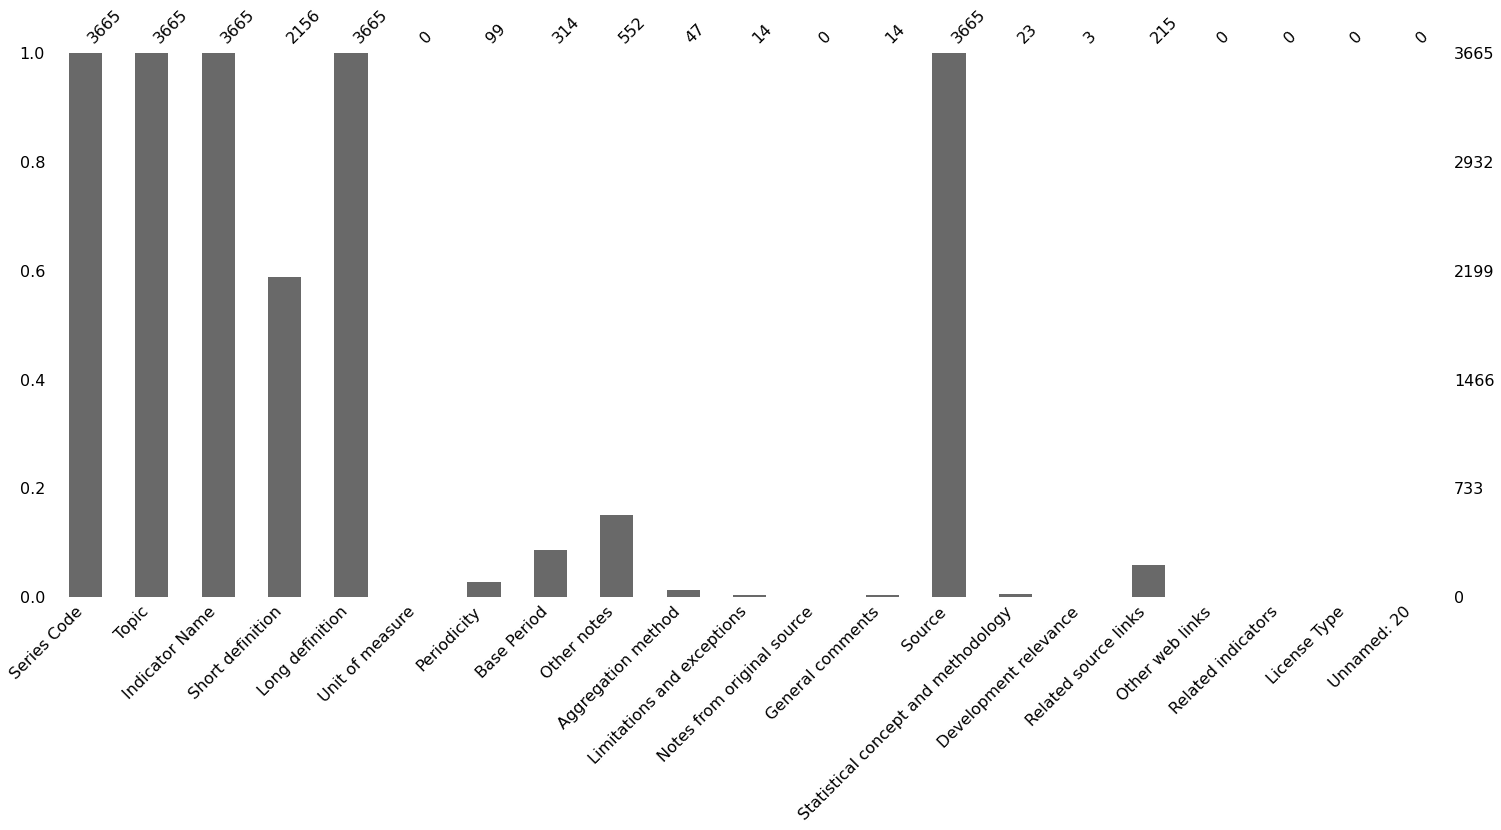

In [68]:
msn.bar(series_df)

### IV-Résumé de l'analyse précédente

In [69]:
#Fonction qui permet d'avoir un dataframe regroupant les différents informations complémentaires à la fonction describe

def desc_bis (df):
    nb_li = df.index.size
    nb_col = df.columns.size
    tot = nb_li*nb_col    
    infos = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'}) 
    infos = infos.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))
    return infos

In [70]:
def infos (df):
    nb_li = df.shape[0]
    nb_co = df.shape[1]
    t = np.empty(nb_li)
    t.fill(nb_li)
    df_l_null = pd.DataFrame(df.T.isna().sum()) #Tableau du nombre de nuls par lignes (+800 000 lignes)
    df_c_null = pd.DataFrame(df.isna().sum())   #Tableau du nombre de nuls par colonnes (+65 colonnes)
    
    #Nombre de lignes sans 'null'
    al = len([x for x in df_l_null[0] if x==0])
    nb_ss_null = pd.DataFrame([al]).rename(index={0:'lign_ss_null'}).T
    pct_ss_null = pd.DataFrame([al*100/nb_li]).rename(index={0:'lign_ss_null'}).T
    #Nombre de lignes 'null'
    bl = len([x for x in df_l_null[0] if x==nb_co])
    nb_null = pd.DataFrame([bl]).rename(index={0:'lign_null'}).T
    pct_null = pd.DataFrame([bl*100/nb_li]).rename(index={0:'lign_null'}).T
    #Nombre de lignes mixtes
    cl = len([x for x in df_l_null[0] if (x!=0 and x!=nb_co)])
    nb_mix = pd.DataFrame([cl]).rename(index={0:'lign_mix'}).T
    pct_mix = pd.DataFrame([cl*100/nb_li]).rename(index={0:'lign_mix'}).T
    infos_nb = pd.concat([nb_ss_null, nb_null, nb_mix],axis=1, sort=False).rename(index={0:'nb'})
    infos_pct = pd.concat([pct_ss_null, pct_null, pct_mix],axis=1, sort=False).rename(index={0:'pct'})
    infos_l = pd.concat([infos_nb,infos_pct], sort=False)
    #Nombre de lignes total
    infos_l["lign_tot"] = [infos_l.T['nb'].sum(), infos_l.T['pct'].sum()]
    
    #Nombre de colonnes sans 'null'
    ac = len([x for x in df_c_null[0] if x==0])
    nb_ss_null = pd.DataFrame([ac]).rename(index={0:'col_ss_null'}).T
    pct_ss_null = pd.DataFrame([ac*100/nb_co]).rename(index={0:'col_ss_null'}).T
    #Nombre de colonnes 'null'
    bc = len([x for x in df_c_null[0] if x==nb_li])
    nb_null = pd.DataFrame([bc]).rename(index={0:'col_null'}).T
    pct_null = pd.DataFrame([bc*100/nb_co]).rename(index={0:'col_null'}).T
    #Nombre de colonnes mixtes
    cc = len([x for x in df_c_null[0] if (x!=0 and x!=nb_li)])
    nb_mix = pd.DataFrame([cc]).rename(index={0:'col_mix'}).T
    pct_mix = pd.DataFrame([cc*100/nb_co]).rename(index={0:'col_mix'}).T
    infos_nb = pd.concat([nb_ss_null, nb_null, nb_mix],axis=1, sort=False).rename(index={0:'nb'})
    infos_pct = pd.concat([pct_ss_null, pct_null, pct_mix],axis=1, sort=False).rename(index={0:'pct'})
    infos_c = pd.concat([infos_nb,infos_pct], sort=False)
    #Nombre de colonnes total
    infos_c["col_tot"] = [infos_c.T['nb'].sum(), infos_c.T['pct'].sum()]
    
    infos = pd.concat([infos_l,infos_c], axis=1, sort=False)
    
    return infos

In [71]:
#Comptage des valeurs nulles défini par les NAN par lignes et par colonnes pour les 5 tables
infos_res = pd.concat([infos(country_df), infos(country_series_df), infos(data_df), infos(footnote_df), infos(series_df)], axis = 0, keys = ['country_df', 'country_series_df', 'data_df', 'footnote_df', 'series_df'])
pd.options.display.float_format = '{:.1f}'.format
infos_res

lign_ss_null  lign_null  lign_mix  lign_tot  \
country_df        nb            0.0        0.0     241.0     241.0   
                  pct           0.0        0.0     100.0     100.0   
country_series_df nb            0.0        0.0     613.0     613.0   
                  pct           0.0        0.0     100.0     100.0   
data_df           nb            0.0        0.0  886930.0  886930.0   
                  pct           0.0        0.0     100.0     100.0   
footnote_df       nb            0.0        0.0  643638.0  643638.0   
                  pct           0.0        0.0     100.0     100.0   
series_df         nb            0.0        0.0    3665.0    3665.0   
                  pct           0.0        0.0     100.0     100.0   

                       col_ss_null  col_null  col_mix  col_tot  
country_df        nb           4.0       1.0     27.0     32.0  
                  pct         12.5       3.1     84.4    100.0  
country_series_df nb           3.0       1.0      0.0      4.0  
                  pct         75.0      25.0      0.0    100.0  
data_df           nb           4.0       1.0     65.0     70.0  
                  pct          5.7       1.4     92.9    100.0  
footnote_df       nb           4.0       1.0      0.0      5.0  
                  pct         80.0      20.0      0.0    100.0  
series_df         nb           5.0       6.0     10.0     21.0  
                  pct         23.8      28.6     47.6    100.0

In [72]:
#Fonction de comptage des valeurs nulles, joue le role de la fonction describe()
def evalNull (inf_df):
    a = inf_df.T['null'].sum()
    b = inf_df.T['count'].sum()
    print("Nbe valeurs 'null' : {:.0f}".format(a))
    print("Nbe valeurs non 'null' : {:.0f}".format(b))
    print("Nbe total cases : {:.0f}".format(a+b))
    print("% total valeurs 'null' : {:.1f}%".format(a*100/(a+b)))

In [73]:
inf_country_df = desc_bis(country_df).append(country_df.describe(include = 'all'))

In [74]:
evalNull(inf_country_df)
inf_country_df

Nbe valeurs 'null' : 2354
Nbe valeurs non 'null' : 5358
Nbe total cases : 7712
% total valeurs 'null' : 30.5%


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
Type,object,object,object,object,object,object,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object,float64
null,0,0,0,0,3,26,96,27,27,1,36,209,44,97,183,26,194,96,60,117,41,80,60,28,100,81,130,99,134,56,62,241
count,241,241,241,241,238,215,145,214,214,240,205,32.0,197,144,58,215,47,145,181,124,200,161,181,213,141,160,111,142,107.0,185.0,179,0.0
unique,241,241,241,241,238,152,131,7,5,240,43,NaN,2,3,2,3,32,3,1,3,2,2,2,27,60,75,2,35,NaN,NaN,20,NaN
top,ABW,Aruba,Aruba,Aruba,AW,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,AW,2005,NaN,Value added at basic prices (VAB),IBRD,HIPC,Country uses the 1993 System of National Accou...,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,NaN,NaN,2000,NaN
freq,1,1,1,1,1,23,6,57,55,1,34,NaN,163,67,40,165,8,98,181,107,106,95,110,59,10,15,110,36,NaN,NaN,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.1,2011.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,2.6,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,1995.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.5,2011.0,NaN,NaN


In [75]:
inf_country_series_df = desc_bis(country_series_df).append(country_series_df.describe(include = 'all'))
evalNull(inf_country_series_df)
inf_country_series_df

Nbe valeurs 'null' : 613
Nbe valeurs non 'null' : 1839
Nbe total cases : 2452
% total valeurs 'null' : 25.0%


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
Type,object,object,object,float64
null,0,0,0,613
count,613,613,613,0.0
unique,211,21,97,NaN
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
freq,18,211,154,NaN
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN


In [76]:
inf_data_df = desc_bis(data_df).append(data_df.describe(include = 'all'))
evalNull(inf_data_df)
inf_data_df

Nbe valeurs 'null' : 53455179
Nbe valeurs non 'null' : 8629921
Nbe total cases : 62085100
% total valeurs 'null' : 86.1%


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Type,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null,0,0,0,0,814642,851393,851311,851385,851200,799624,849447,849356,849354,850121,797808,848153,849419,848470,848324,796634,847558,848289,848378,849390,762525,812493,811387,811137,809468,755569,810123,813477,802016,768091,710254,763421,762725,756567,758116,702822,746618,749658,752543,744822,644488,740918,739666,749421,773141,755872,870470,886787,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,886930
count,886930,886930,886930,886930,72288.0,35537.0,35619.0,35545.0,35730.0,87306.0,37483.0,37574.0,37576.0,36809.0,89122.0,38777.0,37511.0,38460.0,38606.0,90296.0,39372.0,38641.0,38552.0,37540.0,124405.0,74437.0,75543.0,75793.0,77462.0,131361.0,76807.0,73453.0,84914.0,118839.0,176676.0,123509.0,124205.0,130363.0,128814.0,184108.0,140312.0,137272.0,134387.0,142108.0,242442.0,146012.0,147264.0,137509.0,113789.0,131058.0,16460.0,143.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,0.0
unique,242,242,3665,3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3665,3665,242,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1974772449.6,4253638470.2,4592364905.3,5105005610.9,5401492903.4,2314287511.6,5731808142.1,6124437154.2,6671488719.0,7436723955.0,3283897508.6,7664969392.5,7913721582.3,7856908292.0,8118001691.3,3622763069.6,9156550107.9,10149008176.4,11047093700.6,11954359464.5,9084423550.7,15716740023.5,16046684980.9,16435324911.6,16840220344.1,10525426793.2,18746300978.4,20273850045.0,17946782924.0,13315578553.5,9423383683.8,13848674153.9,14282985240.2,14493931504.0,15897290510.7,11886369143.0,16846738101.8,18723002078.7,20297938641.7,18949069733.0,11895924324.6,21179108774.0,21763227127.6,24253320032.2,26784486485.5,23537199876.5,193441064053.0,2.2,578.1,605.5,631.6,655.7,675.2,691.1,704.1,714.6,722.5,727.1,728.4,726.6,722.8,717.7,711.3,703.4,694.0,NaN
std,NaN,NaN,NaN,NaN,121168685352.0,180481446225.2,191408271479.8,205917043980.7,211214985371.1,137505922744.8,221554619977.1,232548901067.3,247398632281.3,266095745106.0,178077355006.1,274414168518.6,279054890539.2,282380912099.2,294063483007.3,200292918507.1,326467474653.7,353535110136.2,380425690032

In [77]:
inf_footnote_df = desc_bis(footnote_df).append(footnote_df.describe(include = 'all'))
evalNull(inf_footnote_df)
inf_footnote_df

Nbe valeurs 'null' : 643638
Nbe valeurs non 'null' : 2574552
Nbe total cases : 3218190
% total valeurs 'null' : 20.0%


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
Type,object,object,object,object,float64
null,0,0,0,0,643638
count,643638,643638,643638,643638,0.0
unique,239,1558,56,9102,NaN
top,LIC,SH.DYN.MORT,YR2004,Country Data,NaN
freq,7320,9226,27128,191188,NaN
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN


In [78]:
inf_series_df = desc_bis(series_df).append(series_df.describe(include = 'all'))
evalNull(inf_series_df)
inf_series_df

Nbe valeurs 'null' : 55203
Nbe valeurs non 'null' : 21762
Nbe total cases : 76965
% total valeurs 'null' : 71.7%


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
Type,object,object,object,object,object,float64,object,object,object,object,object,float64,object,object,object,object,object,float64,float64,float64,float64
null,0,0,0,1509,0,3665,3566,3351,3113,3618,3651,3665,3651,0,3642,3662,3450,3665,3665,3665,3665
count,3665,3665,3665,2156,3665,0.0,99,314,552,47,14,0.0,14,3665,23,3,215,0.0,0.0,0.0,0.0
unique,3665,37,3665,1169,2060,NaN,1,4,14,3,9,NaN,8,31,2,1,1,NaN,NaN,NaN,NaN
top,BAR.NOED.1519.FE.ZS,Learning Outcomes,Barro-Lee: Percentage of female population age...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,Annual,Projections (2010 to 2100),EGRA,Weighted average,Data should be used cautiously because of diff...,NaN,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN,NaN
freq,1,1046,1,215,215,NaN,99,308,403,31,3,NaN,3,1269,20,3,215,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### V-Description des données 

In [17]:
#Dans cette partie nous allons procédé à une description gnérale des données
#Pour chacun des DataFrame ci-dessus, nous utiliserons la méthode .info() qui nous permet de lister: 
#le nombre de lignes, le nombre de colonne, et pour chaque colonne, le nombre de valeur nulles.

def format_percentage(value):
    '''
    Formater un pourcentage avec 1 chiffre après la virgule 
    '''
    return "{0:.1f}%".format(value * 100)


#Création d'un tableau contenant toutes les informations sur les 5 fichiers
files_description = pd.DataFrame(columns = ["Nb lignes", "Nb colonnes", "Taux remplissage moyen", "Doublons", "Description"],
                                 index = ["EdStatsCountry.csv",
                                          "EdStatsCountry-Series.csv",
                                          "EdStatsData.csv",
                                          "EdStatsFootNote.csv",
                                          "EdStatsSeries.csv"])

#Remplir le nombre total de lignes dans chaque fichier
files_description["Nb lignes"] = [
    len(country_df.index),
    len(country_series_df.index),
    len(data_df.index),
    len(footnote_df.index),
    len(series_df.index)
]

#Remplir le nombre de colonnes dans chaque fichier
files_description["Nb colonnes"] = [
    len(country_df.columns),
    len(country_series_df.columns),
    len(data_df.columns),
    len(footnote_df.columns),
    len(series_df.columns)
]

#Remplir le centile de remplissage de chaque fichier
#Nous utilisons la fonction .mean() deux fois pour calculer la moyenne de chaque colonne, puis la moyenne de l'ensemble du fichier
files_description["Taux remplissage moyen"] = [
    format_percentage(country_df.notna().mean().mean()),
    format_percentage(country_series_df.notna().mean().mean()),
    format_percentage(data_df.notna().mean().mean()),
    format_percentage(footnote_df.notna().mean().mean()),
    format_percentage(series_df.notna().mean().mean())
]

#Remplir le nombre de doublons pour chaque fichier
files_description["Doublons"] = [
    country_df.duplicated(subset=["Country Code"]).sum(),
    country_series_df.duplicated(subset=["CountryCode", "SeriesCode"]).sum(),
    data_df.duplicated(subset=["Country Code", "Indicator Name"]).sum(),
    footnote_df.duplicated(subset=["CountryCode", "SeriesCode", "Year"]).sum(),
    series_df.duplicated(subset=["Indicator Name"]).sum(),
]

#Ajout d'une courte description pour chaque fichier
files_description["Description"] = [
    "Liste des pays avec leurs données principales",
    "Description des différentes séries de données",
    "Données de chaque indicateur par pays et par année",
    "Commentaire pour chaque couple série de données / pays",
    "Liste des indicateurs avec description, unité, période, ...etc"]


files_description

,Nb lignes,Nb colonnes,Taux remplissage moyen,Doublons,Description
EdStatsCountry.csv,241,32,69.5%,0,Liste des pays avec leurs données principales
EdStatsCountry-Series.csv,613,4,75.0%,0,Description des différentes séries de données
EdStatsData.csv,886930,70,13.9%,0,Données de chaque indicateur par pays et par a...
EdStatsFootNote.csv,643638,5,80.0%,0,Commentaire pour chaque couple série de donnée...
EdStatsSeries.csv,3665,21,28.3%,0,"Liste des indicateurs avec description, unité,..."


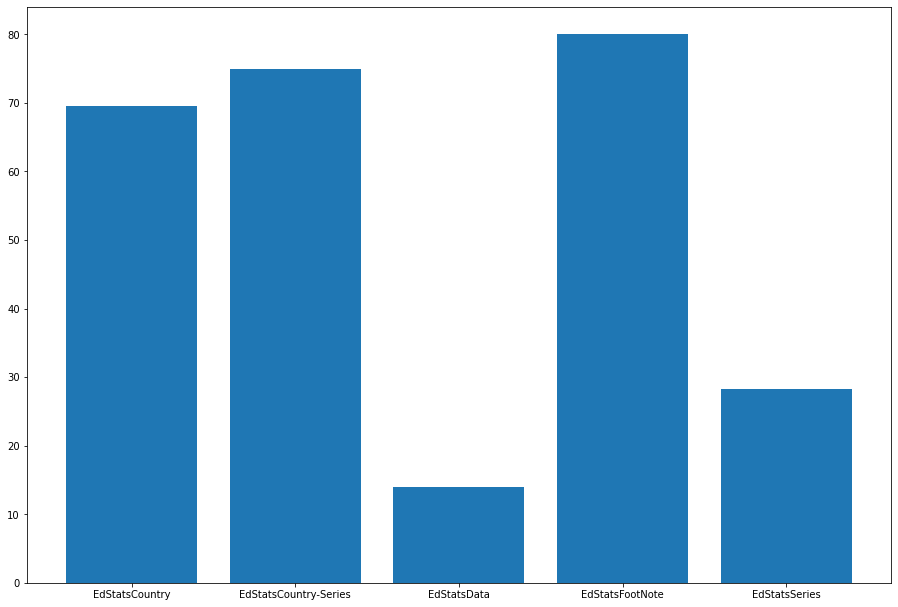

In [19]:
#Visualisation du taux de remplissage global pour chaque tableau
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
Data = ['EdStatsCountry', 'EdStatsCountry-Series', 'EdStatsData', 'EdStatsFootNote', 'EdStatsSeries']
Taux_remplissage_moyen = [69.5,75.0,13.9,80.0,28.3]
ax.bar(Data,Taux_remplissage_moyen)
plt.show()

1.La table "Country" (table 1: EdStatsCountry.csv) est composée de 241 lignes correspondant aux pays sur lesquels portent les données. Chaque colonne donne des renseignements sur les pays.

2.La table "Country-series" (table 2: EdStatsCountry-series.csv) comporte 613 lignes donne des indications sur les sources des données de divers couples Indicateur/Pays.

3.La table "Data" (table 3: EdStatsData.csv) est composée de 886930 lignes qui correspondent à toutes les combinaisons des entrées uniques des colonnes "Country Code" et "Indicator Code" (respectivement 242 et 3665 entrées uniques). On trouve dans chaque ligne correspondant à un couple Indicateur/Pays la valeur d'un indicateur pour un pays. Les colonnes détaillent les valeurs pour chaque année de 1970 à 2017 (48 colonnes), puis des projections de ces valeurs tous les 5 ans des années 2020 à 2100 (17 colonnes).

4.La table "FootNote" (table 4: EdStatsFootNote.csv) comporte 643638 lignes, et donne des précisions (mode de calcul ou autre) relatives à divers couples Indicateur/Pays.

5.La table "Series"(table 5: EdStatsSeries.csv) est composée de 3665 lignes correspondant chacune à un indicateur statistique.

### VI-Choix des indicateurs

In [10]:
#Préparation d'une liste qui contiendra tous les codes indicateurs que nous souhaitons conserver
choosen_indicators = []


#Population étudiante:
#Plusieurs indicateurs peuvent nous aider à cibler la population qui nous intéresse, sachant que l'on cherche à chiffrer l'effectif de la population lycée/université, soit environ la tranche d'âge 15-25 ans.

#SP.POP.TOTL: population totale à la mi-année décomposée en SP.POP.TOTL.FE.IN (femmes) et SP.POP.TOTL.MA.IN (hommes)
#SP.POP.GROW: taux de croissance de la population -> utile pour les projections futures
#SP.POP.1524.TO.UN: population totale de la tranche 15-24 ans
#SP.SEC.TOTL.IN: population totale ayant l'âge d'entrer en éducation secondaire (secondary ed.)
#SP.SEC.UTOT.IN: population totale ayant l'âge d'entrer en éducation secondaire élevée (upper secondary ed.)
#SP.TER.TOTL.IN: population totale ayant l'âge d'entrer en éducation tertiaire (tertiary ed.)
#On va tous les conserver dans un premier temps et on analysera ensuite lequel (ou lesquels) sont les plus pertinents et les plus fiables pour notre utilisation

population_indicators = ["SP.POP.TOTL", "SP.POP.GROW", "SP.POP.1524.TO.UN", "SP.SEC.TOTL.IN", "SP.SEC.UTOT.IN", 
                         "SP.TER.TOTL.IN"]


#Accès à internet:
#En terme de communication, deux indicateurs nous indiquent le pourcentage d'ordinateurs personnels et de connexion internet pour 100 habitants:

#IT.NET.USER.P2: pourcentage d'utilisateurs d'internet
#IT.CMP.PCMP.P2: pourcentage de possesseur d'un ordinateur personnel

internet_indicators = ["IT.NET.USER.P2", "IT.CMP.PCMP.P2"]


#Revenu moyen du pays:
#Même si cet indicateur sera probablement fortement lié à l'accès à un ordinateur personnel, il nous permettra de savoir si la population a, ou non, sensiblement le même pouvoir d'achat qu'un pays de référence (voir plus bas).

#Le dataset nous donne accès au PNB par habitant ainsi qu'au PIB par habitant. Ce dernier est le plus représentatif du niveau de vie moyen du pays, surtout qu'il est ici exprimé en Parité de Pouvoir d'Achat (PPA) ce qui signifie qu'on tient compte du coût de la vie dans le pays. Cela permet d'avoir une comparaison plus fiable entre les pays.

#NY.GDP.MKTP.PP.CD: PIB (PPP - Current US Dollar)
#NY.GDP.PCAP.PP.CD: PIB par habitant (PPP - Current US Dollar)
#Pour l'analyse, cet indicateur est important, anisi, sera supprimé du jeu de données tous les pays pour lesquels il n'est pas renseigné

revenue_indicators = ["NY.GDP.PCAP.PP.CD"]


#Récapitulatif des indicateurs

choosen_indicators.extend(population_indicators)
choosen_indicators.extend(internet_indicators)
choosen_indicators.extend(revenue_indicators)

choosen_indicators

['SP.POP.TOTL',
 'SP.POP.GROW',
 'SP.POP.1524.TO.UN',
 'SP.SEC.TOTL.IN',
 'SP.SEC.UTOT.IN',
 'SP.TER.TOTL.IN',
 'IT.NET.USER.P2',
 'IT.CMP.PCMP.P2',
 'NY.GDP.PCAP.PP.CD']

### VII-Pré-filtrage

### VII-1-Suppression des indicateurs non retenus 

In [13]:
#Filtrage du jeu de données sur les indicateurs sélectionnés
data_df_c = data_df_c[data_df_c["Indicator Code"].isin(choosen_indicators)]

#Affichage d'un avertissement si un indicateur choisi n'est pas dans l'ensemble de données
if len(choosen_indicators) > len(data_df_c["Indicator Code"].unique()):
    print("ATTENTION : certains indicateurs n'ont pas été trouvé dans le tableau de données")
    
#Suppression des colonnes qui ne sont pas utiles (nous gardons les colonnes importantes à notre analyse)
data_df_c = data_df_c.drop(["Country Name", "Indicator Name"], axis=1, errors="ignore")

data_df_c

,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
1247,ARB,NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.468099e+03,6.366215e+03,6.720916e+03,6.965819e+03,7.166538e+03,7.307019e+03,7.641588e+03,8.016782e+03,8.409948e+03,8.654207e+03,9.090647e+03,9.327194e+03,9.393421e+03,9.698660e+03,1.066980e+04,1.140472e+04,1.228111e+04,1.300436e+04,1.373891e+04,1.385056e+04,1.444467e+04,1.482591e+04,1.571614e+04,1.605255e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1375,ARB,IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1.702505e-02,3.776069e-02,1.310456e-01,2.616151e-01,5.985821e-01,1.139541e+00,1.561288e+00,2.693061e+00,3.645881e+00,7.006812e+00,8.393142e+00,1.165465e+01,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2084,ARB,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.379000e-01,8.181984e-01,9.500904e-01,1.147074e+00,1.406665e+00,1.707795e+00,1.887733e+00,2.414015e+00,2.517600e+00,3.401317e+00,3.979838e+00,5.305007e+00,6.676681e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307,ARB,SP.POP.GROW,2.767219e+00,2.694623e+00,2.658899e+00,2.687857e+00,2.795847e+00,2.948191e+00,3.106885e+00,3.228207e+00,3.288608e+00,3.272429e+00,3.205090e+00,3.128342e+00,3.062971e+00,2.997669e+00,2.914810e+00,2.901453e+00,2.851010e+00,2.765726e+00,2.697355e+00,2.615089e+00,3.541847e+00,2.701009e+00,1.746289e+00,2.581814e+00,2.465317e+00,2.973166e+00,2.166865e+00,2.081693e+00,2.019946e+00,2.016759e+00,2.077299e+00,2.137064e+00,2.182727e+00,2.214497e+00,2.272483e+00,2.311472e+00,2.356627e+00,2.386344e+00,2.381136e+00,2.323576e+00,2.230786e+00,2.128048e+00,2.063874e+00,2.012570e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2323,ARB,SP.SEC.TOTL.IN,1.887675e+07,1.947298e+07,1.994125e+07,2.042827e+07,2.096031e+07,2.155374e+07,2.219776e+07,2.261543e+07,2.319783e+07,2.383897e+07,2.452624e+07,2.547489e+07,2.605712e+07,2.662792e+07,2.720360e+07,2.778897e+07,2.838625e+07,2.896394e+07,2.959044e+07,2.975813e+07,3.078516e+07,3.105066e+07,3.189258e+07,3.280431e+07,3.376323e+07,3.475187e+07,3.575596e+07,3.667802e+07,3.761274e+07,3.830962e+07,3.904546e+07,3.967497e+07,4.033736e+07,4.177082e+07,4.219553e+07,4.262789e+07,4.298773e+07,4.404203e+07,4.428236e+07,4.425107e+07,4.428212e+07,4.427659e+07,4.435677e+07,4.446921e+07,43786276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885588,ZWE,SP.SEC.TOTL.IN,6.752820e+05,7.046000e+05,7.299310e+05,7.534980e+05,7.784100e+05,8.060640e+05,8.324490e+05,8.616450e+05,8.934020e+05,9.274950e+05,9.641660e+05,1.000598e+06,1.038324e+06,1.077458e+06,1.118436e+06,1.161275e+06,1.207011e+06,1.305279e+06,1.359122e+06,1.413199e+06,1.466415e+06,1.524295e+06,1.583041e+06,1.641435e+06,1.698872e+06,1.755477e+06,1.813412e+06,1.867657e+06,1.915144e+06,1.954222e+06,1.983407e+06,1.998598e+06,2.008258e+06,2.015561e+06,2.023873e+06,2.034066e+06,2.026737e+06,2.020780e+06,2.016726e+06,2.015706e+06,2.018022e+06,2.009047e+06,2.007007e+06,2.012733e+06,2026425.0,2047619.0,2069539.0,NaN,NaN,NaN,Na

In [14]:
#Suppression des colonnes entierement vides
data_df_c.dropna(axis=1, how="all", inplace=True)

In [15]:
#Suppression des pays avec une faible population
#Afin de faciliter le travail d'analyse à venir et réduire significativement le nombre de ligne, nous allons commencer par éliminer les pays à la population trop faible.

#Population minimale des pays que nous conservons dans l'ensemble de données
MINIMUM_POPULATION = 2000000


#Étape 1: Récupération des données de population à partir de l'ensemble de la donnée principale
countries_populations = data_df_c[data_df_c["Indicator Code"] == "SP.POP.TOTL"]

#Étape 2: Suppression des colonnes où toutes les valeurs sont des NaN
countries_populations.reset_index(inplace=True)
countries_populations.set_index("Country Code", inplace=True)

#Étape 3: Calcul de la population moyenne pour chaque pays
countries_populations = countries_populations.mean(axis=1).to_frame()
countries_populations.columns = ["Population"]

#Étape 4: Conserver le code des pays
biggest_countries_codes = countries_populations[countries_populations["Population"] >= MINIMUM_POPULATION].index.values

#Étape finalle: filtrer les données
data_df_c = data_df_c[data_df_c["Country Code"].isin(biggest_countries_codes)]

C:\Users\archi\AppData\Local\Temp/ipykernel_2628/3202514992.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  countries_populations = countries_populations.mean(axis=1).to_frame()


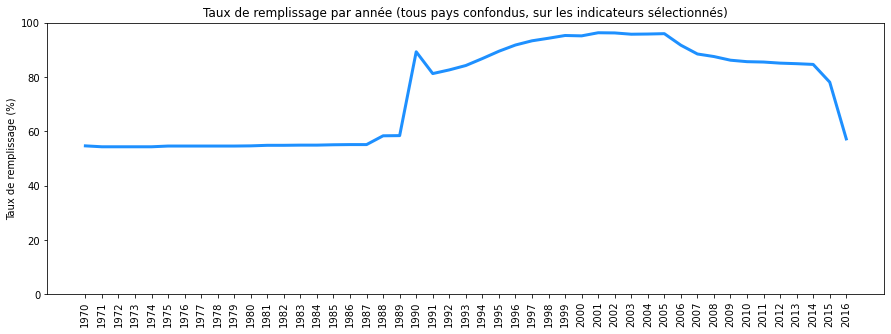

In [16]:
#Suppression des années trop anciennes et mal renseignées
#Pour cela, nous analyserons le taux de remplissage des données de nos indicateurs retenus, par année, ce qui nous permettra d'en supprimer une partie.

#Pour le prochain filtrage, nous souhaitons connaître le taux de remplissage global de tous les indicateurs sélectionnés
year_filling = data_df_c.drop(columns=["Country Code", "Indicator Code"]).notnull().sum(axis=0).to_frame()

#Nous calculons le taux de remplissage en centile (valeurs max possibles par an = nb de pays * nb d'indicateurs)
max_values = len(choosen_indicators) * len(data_df_c["Country Code"].unique())
year_filling = 100 * year_filling / max_values

fig1 = plt.figure(figsize=(15,5))
plt.title("Taux de remplissage par année (tous pays confondus, sur les indicateurs sélectionnés)")
plt.xticks(rotation = 90)
plt.ylim(ymin=0, ymax=100)
plt.ylabel("Taux de remplissage (%)")
plt.plot(year_filling.index.values, year_filling[0], color="dodgerblue", linewidth=3)

In [17]:
#Années à conserver dans l'ensemble de données (ont été choisies en analysant les données ci-dessus)
MIN_YEAR = 2005
MAX_YEAR = 2015

In [20]:
#Nous sauvegardons les données avant de les filtrer car nous en avons besoin ci-dessous
data_before_year_filtering = data_df_c.copy(deep=True)

#Isoler les colonnes que nous voulons supprimer du dataframe
years = list(filter(lambda x: re.match("^\d{4}$", x), data_df_c.columns.values))
dropped_years = [year for year in years if int(year) < MIN_YEAR or int(year) > MAX_YEAR]

#Supprimer les valeurs indésirables
data_df_c = data_df_c.drop(columns=dropped_years)

data_df_c

,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1247,ARB,NY.GDP.PCAP.PP.CD,1.140472e+04,1.228111e+04,1.300436e+04,1.373891e+04,1.385056e+04,1.444467e+04,1.482591e+04,1.571614e+04,1.605255e+04,NaN,NaN
1375,ARB,IT.NET.USER.P2,8.393142e+00,1.165465e+01,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN
2084,ARB,IT.CMP.PCMP.P2,5.305007e+00,6.676681e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307,ARB,SP.POP.GROW,2.311472e+00,2.356627e+00,2.386344e+00,2.381136e+00,2.323576e+00,2.230786e+00,2.128048e+00,2.063874e+00,2.012570e+00,NaN,NaN
2323,ARB,SP.SEC.TOTL.IN,4.262789e+07,4.298773e+07,4.404203e+07,4.428236e+07,4.425107e+07,4.428212e+07,4.427659e+07,4.435677e+07,4.446921e+07,43786276.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885588,ZWE,SP.SEC.TOTL.IN,2.034066e+06,2.026737e+06,2.020780e+06,2.016726e+06,2.015706e+06,2.018022e+06,2.009047e+06,2.007007e+06,2.012733e+06,2026425.0,2047619.0
885591,ZWE,SP.TER.TOTL.IN,1.542683e+06,1.554849e+06,1.565455e+06,1.576742e+06,1.589291e+06,1.602057e+06,1.601799e+06,1.601931e+06,1.602843e+06,1604698.0,1607620.0
885597,ZWE,SP.SEC.UTOT.IN,1.344484e+06,1.341028e+06,1.338730e+06,1.337559e+06,1.337565e+06,1.338788e+06,1.331526e+06,1.327364e+06,1.327040e+06,1331677.0,1342035.0
885747,ZWE,SP.POP.1524.TO.UN,3.266903e+06,3.309907e+06,3.342927e+06,3.366486e+06,3.381553e+06,3.389035e+06,3.389423e+06,3.383141e+06,3.371070e+06,3354236.0,3333716.0


### VII-2-Taux de remplissage global de chaque indicateur

<BarContainer object of 9 artists>

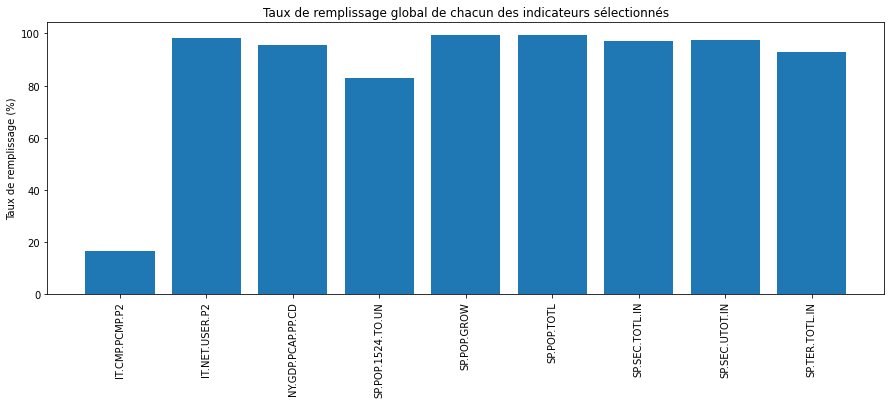

In [22]:
#Vérification du taux de remplissage des indicateurs choisis sur les années sélectionnées.

# Calcul du nombre de valeurs (non NaN) que nous avons pour chaque indicateur et nous le divisons par le nombre de pays
indicator_filling = (data_df_c
                     .drop(columns=["Country Code"])
                     .set_index("Indicator Code")
                     .notnull()
                     .groupby("Indicator Code")
                     .sum())
indicator_filling = 100 * indicator_filling / len(data_df_c["Country Code"].unique())

#Tracer le résultat
fig2 = plt.figure(figsize=(15,5))
plt.title("Taux de remplissage global de chacun des indicateurs sélectionnés")
plt.xticks(rotation = 90)
plt.ylabel("Taux de remplissage (%)")
plt.bar(indicator_filling.index.values, indicator_filling.mean(axis=1))

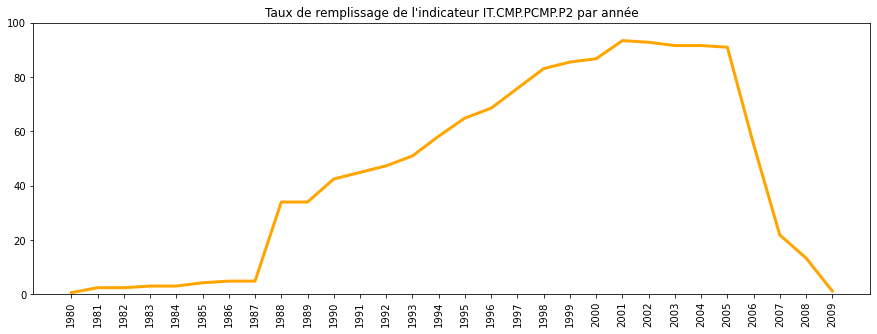

In [23]:
#Nous calculons le pourcentage de remplissage de l'indicateur donné pour chaque année
pcmp_filling = data_before_year_filtering[data_before_year_filtering["Indicator Code"] == "IT.CMP.PCMP.P2"]
pcmp_filling = (pcmp_filling
                .drop(columns=["Country Code"])
                .set_index("Indicator Code")
                .notnull()
                .groupby("Indicator Code")
                .sum())
pcmp_filling = pcmp_filling / len(data_before_year_filtering["Country Code"].unique())
pcmp_filling = pcmp_filling.loc[:, (pcmp_filling != 0).any(axis=0)]

#Tracer le résultat
fig3 = plt.figure(figsize=(15,5))
plt.title("Taux de remplissage de l'indicateur IT.CMP.PCMP.P2 par année")
plt.xticks(rotation = 90)
plt.ylim(ymin=0, ymax=100)
plt.plot(pcmp_filling.columns.values, 100 * pcmp_filling.loc["IT.CMP.PCMP.P2"], color="orange", linewidth=3)

### VII-3-Taux de remplissage par région géographique

                            2005  2006  2007  2008  2009  2010  2011  2012  \
Region                                                                       
East Asia & Pacific          154   151   145   142   141   140   139   138   
Europe & Central Asia        360   351   337   332   325   322   321   322   
Latin America & Caribbean    195   177   179   178   174   171   174   174   
Middle East & North Africa   138   136   131   129   124   123   122   120   
North America                 18    18    16    16    16    16    16    16   
South Asia                    53    51    49    48    48    48    48    47   
Sub-Saharan Africa           306   284   280   279   276   276   274   271   

                            2013  2014  2015  
Region                                        
East Asia & Pacific          137   139   135  
Europe & Central Asia        322   323   314  
Latin America & Caribbean    174   173   172  
Middle East & North Africa   120   123   121  
North America  

<BarContainer object of 7 artists>

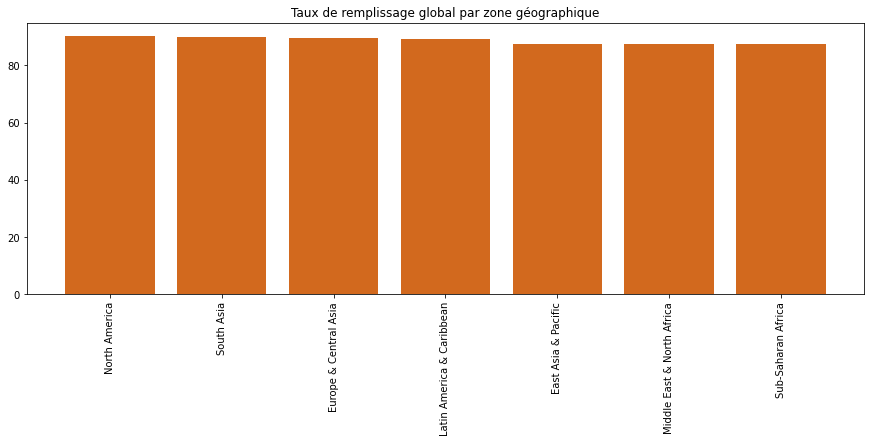

In [24]:
#Étape 1: Nous isolons le code du pays et la région du pays et gardons uniquement les pays sélectionnés
regions = (country_df[country_df["Country Code"].isin(biggest_countries_codes)]
           .set_index("Country Code")
           .filter(items=["Region"]))

#Étape 2: Nous calculons le nombre de pays que nous avons par région afin de calculer notre centile 
country_per_region = (regions
                      .reset_index()
                      .set_index("Region")
                      .notnull()
                      .groupby("Region")
                      .sum())
country_per_region.columns = ["Total countries"]

# Étape 3: Nous comptons le nombre d'indicateurs remplis pour chaque région
geographical_data = data_df_c.copy(deep=True)
geographical_data = (geographical_data
                     .merge(regions, how="left", on="Country Code")
                     .drop(columns=["Country Code", "Indicator Code"])
                     .dropna(axis=0, how="any", subset=["Region"])
                     .set_index("Region")
                     .notnull()
                     .groupby("Region")
                     .sum())
nb_of_years = len(geographical_data.columns)
print(geographical_data)
geographical_data = geographical_data.sum(axis=1).to_frame().astype("float")

#Étape 4: Nous divisons le nombre d'indicateurs remplis par le nombre d'indicateurs théoriques par région
for region, total in geographical_data.itertuples():
    region_max = country_per_region.loc[region]["Total countries"] * nb_of_years * len(choosen_indicators)
    geographical_data.loc[region][0] = geographical_data.loc[region][0] / region_max

#Étape 6: Nous trions les résultats pour améliorer la lisibilité du graphique
geographical_data.sort_values(by=[0], axis=0, ascending=False, inplace=True)

#Nous traçons les résultats sous forme de graphe
fig4 = plt.figure(figsize=(15,5))
plt.title("Taux de remplissage global par zone géographique")
plt.xticks(rotation = 90)
plt.bar(geographical_data.index.values, 100 * geographical_data[0], color="chocolate")

###  VIII-Regroupement des indicateurs

In [26]:
#Création d'un tableau avec la valeur moyenne de chaque indicateur pour chaque pays
final_indicators_values = (
                           (data_df_c[data_df_c["Indicator Code"].isin(choosen_indicators)]
                            .groupby(["Country Code", "Indicator Code"])
                            .mean()
                           )
                           .mean(axis=1)
                           .to_frame()
                           .unstack(level=1)
                           .droplevel(0, axis=1)
                           .drop(columns=["IT.CMP.PCMP.P2"]))

#Remplissage de l'indicateur IT.CMP.PCMP.P2 avec l'année 2001-2005
pcmp_data = data_df.copy(deep=True)
kept_years = ["2001", "2002", "2003", "2004", "2005"]
pcmp_data = (pcmp_data[(pcmp_data["Indicator Code"] == "IT.CMP.PCMP.P2") 
                       & (pcmp_data["Country Code"].isin(biggest_countries_codes))]
             .drop(columns=["Country Name", "Indicator Name", "Indicator Code"])
             .set_index("Country Code")
             .filter(items=kept_years)
             .mean(axis=1)
             .to_frame())
pcmp_data.columns = ["IT.CMP.PCMP.P2"]

#Fusion avec le dataframe précédent
final_indicators_values = final_indicators_values.merge(pcmp_data, how="left", left_index=True, right_index=True)

final_indicators_values

,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,SP.SEC.TOTL.IN,SP.SEC.UTOT.IN,SP.TER.TOTL.IN,IT.CMP.PCMP.P2
Country Code,,,,,,,,,
AFG,4.203256,1522.744280,6.086033e+06,3.050737,2.911948e+07,3.951402e+06,1.851418e+06,2.617563e+06,0.341903
AGO,4.767579,5615.334689,3.759384e+06,3.543825,2.350760e+07,3.086217e+06,1.409631e+06,1.999056e+06,0.288022
ALB,38.632626,9151.101768,5.922224e+05,-0.450159,2.930218e+06,4.242545e+05,2.027324e+05,2.770651e+05,1.298910
ARB,22.573194,13924.325331,NaN,2.243826,3.399244e+08,4.393621e+07,2.143393e+07,3.434931e+07,3.523555
ARE,70.899999,67696.458346,6.966785e+05,7.328954,7.591034e+06,4.965165e+05,2.363435e+05,3.818900e+05,19.040030
...,...,...,...,...,...,...,...,...,...
WLD,28.811730,13019.761900,NaN,1.220566,6.932254e+09,7.735857e+08,3.908681e+08,6.032868e+08,9.487885
YEM,12.317576,3865.832112,5.322463e+06,2.692212,2.366675e+07,3.527940e+06,1.719501e+06,2.518379e+06,1.110148
ZAF,26.180016,11885.731155,9.791719e+06,1.430610,5.111124e+07,5.242876e+06,3.152177e+06,5.215752e+06,7.507682


###   IX-Second filtrage des données

### IX-1-Suppression des pays dits pauvres

In [30]:
#Différence maximale entre le PIB du pays et le PIB du pays de référence (France) - En pourcentage (%)
MAX_REVENUE_PERCENT_DIFF = 50

In [31]:
#Dans un premier temps nous calculons le PIB moyen PPA de notre pays de référence (France)
fra_gdp_ppp = (data_df_c[(data_df_c["Country Code"] == "FRA") & (data_df_c["Indicator Code"] == "NY.GDP.PCAP.PP.CD")]
               .drop(columns=["Country Code", "Indicator Code"])
               .mean(axis=1)
               .values[0])

#Maintenant, nous calculons le PIB PPA minimum que nous voulons 
min_gdp_ppp = fra_gdp_ppp * (1 - (MAX_REVENUE_PERCENT_DIFF / 100))

final_indicators_values = final_indicators_values[final_indicators_values["NY.GDP.PCAP.PP.CD"] >= min_gdp_ppp]

print("Après filtrage par PIB, il reste " + str(len(final_indicators_values)) + " pays.")
final_indicators_values

Après filtrage par PIB, il reste 36 pays.


,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,SP.SEC.TOTL.IN,SP.SEC.UTOT.IN,SP.TER.TOTL.IN,IT.CMP.PCMP.P2
Country Code,,,,,,,,,
ARE,70.899999,67696.458346,6.966785e+05,7.328954,7.591034e+06,4.965165e+05,2.363435e+05,3.818900e+05,19.040030
AUS,75.533792,40319.447119,2.893898e+06,1.519595,2.202987e+07,1.723876e+06,5.868987e+05,1.549280e+06,55.919977
AUT,74.253159,43121.353596,9.985681e+05,0.499110,8.390539e+06,7.453200e+05,3.861671e+05,5.147685e+05,52.812582
BEL,73.230281,39945.278170,1.257487e+06,0.715277,1.089967e+07,7.523212e+05,5.060148e+05,6.570575e+05,30.904856
CAN,80.177273,40888.846541,4.436876e+06,1.033865,3.402655e+07,2.524405e+06,1.574099e+06,2.295170e+06,60.959971
CHE,81.728371,53839.470734,9.425225e+05,1.036866,7.832566e+06,6.209898e+05,3.611246e+05,4.729457e+05,76.853553
CZE,63.570996,28162.784520,1.231320e+06,0.305898,1.042222e+07,8.775249e+05,4.698136e+05,6.656039e+05,20.846737
DEU,79.690891,40353.950827,9.329035e+06,-0.091866,8.153792e+07,7.436282e+06,2.631099e+06,4.712173e+06,48.211173
DNK,89.456384,42543.280718,6.623500e+05,0.457528,5.544234e+06,4.124765e+05,2.050826e+05,3.283835e+05,61.743074


### IX-2-Sélection du bon indicateur de population 

In [32]:
pop_1524 = (final_indicators_values.merge(country_df[["Country Code", "Short Name"]].set_index("Country Code"), 
                              left_index=True, 
                              right_index=True))[["SP.POP.1524.TO.UN", "Short Name"]]

pop_1524[pop_1524["SP.POP.1524.TO.UN"].isnull()]

,SP.POP.1524.TO.UN,Short Name
Country Code,,
ECS,NaN,Europe & Central Asia (all income levels)
EMU,NaN,Euro area
EUU,NaN,European Union
HIC,NaN,High income
NAC,NaN,North America
OED,NaN,OECD members
PRI,NaN,Puerto Rico


###  IX-3-Remise au propre des données finales

In [33]:
indicators_names = {
    'IT.NET.USER.P2': 'Utilisateurs Internet (%)', 
    'NY.GDP.PCAP.PP.CD': 'PIB par hab (PPA)', 
    'SP.POP.1524.TO.UN': 'Population 15-24 ans',
    'SP.POP.GROW': 'Croissance pop. (%)',
    'IT.CMP.PCMP.P2': 'Possesseurs PC (%)',
    'Short Name': 'Country Name'
}

final_indicators_values = (final_indicators_values
                           .dropna(subset=["SP.POP.1524.TO.UN"])
                           .drop(columns=["SP.POP.TOTL", "SP.SEC.TOTL.IN", "SP.SEC.UTOT.IN", "SP.TER.TOTL.IN"], errors="ignore")
                           .merge(country_df[["Country Code", "Short Name"]].set_index("Country Code"), 
                              left_index=True, 
                              right_index=True)
                           .rename(columns=indicators_names))

final_indicators = indicators_names.keys()
final_indicators_values

,Utilisateurs Internet (%),PIB par hab (PPA),Population 15-24 ans,Croissance pop. (%),Possesseurs PC (%),Country Name
Country Code,,,,,,
ARE,70.899999,67696.458346,6.966785e+05,7.328954,19.040030,United Arab Emirates
AUS,75.533792,40319.447119,2.893898e+06,1.519595,55.919977,Australia
AUT,74.253159,43121.353596,9.985681e+05,0.499110,52.812582,Austria
BEL,73.230281,39945.278170,1.257487e+06,0.715277,30.904856,Belgium
CAN,80.177273,40888.846541,4.436876e+06,1.033865,60.959971,Canada
CHE,81.728371,53839.470734,9.425225e+05,1.036866,76.853553,Switzerland
CZE,63.570996,28162.784520,1.231320e+06,0.305898,20.846737,Czech Republic
DEU,79.690891,40353.950827,9.329035e+06,-0.091866,48.211173,Germany
DNK,89.456384,42543.280718,6.623500e+05,0.457528,61.743074,Denmark


### X-Etude des indicateurs par région géographique 

In [35]:
indicator_analysis_base_data = data_df.copy(deep=True)

indicator_analysis_base_data = (indicator_analysis_base_data[indicator_analysis_base_data["Indicator Code"].isin(final_indicators)]
                           .drop(columns=["Country Name", "Indicator Name"])
                           .reset_index())

#Ajout de la région géographique
regions = (country_df[country_df["Country Code"].isin(biggest_countries_codes)]
           .set_index("Country Code")
           .filter(items=["Region"]))
indicator_analysis_base_data = indicator_analysis_base_data.merge(regions, left_on="Country Code", right_index=True)

###  X-1-Indicateurs principaux : moyenne, médiane, écart-type

In [36]:
#Nous utilisons les données initiales pour cela
indicator_analysis = indicator_analysis_base_data.copy(deep=True)

indicator_analysis = (indicator_analysis
                           .drop(columns=["index", "Country Code"], errors="ignore")
                           .groupby(["Indicator Code", "Region"]).mean())

#Calcul des principaux indicateurs statistiques
indicator_analysis_mean = indicator_analysis.mean(axis=1).to_frame()
indicator_analysis_std = indicator_analysis.std(axis=1).to_frame()
indicator_analysis_med = indicator_analysis.median(axis=1).to_frame()

indicator_analysis_mean = indicator_analysis_mean.merge(indicator_analysis_std, left_index=True, right_index=True)
indicator_analysis_mean = indicator_analysis_mean.merge(indicator_analysis_med, left_index=True, right_index=True)

indicator_analysis_mean.columns = ["Mean", "Std", "Median"]

indicator_analysis_mean

Mean           Std  \
Indicator Code    Region                                                   
IT.CMP.PCMP.P2    East Asia & Pacific         1.394368e+01  1.212184e+01   
                  Europe & Central Asia       1.484602e+01  9.808040e+00   
                  Latin America & Caribbean   3.422365e+00  2.366942e+00   
                  Middle East & North Africa  5.669726e+00  4.194042e+00   
                  North America               2.899762e+01  2.497240e+01   
                  South Asia                  6.095850e-01  8.072253e-01   
                  Sub-Saharan Africa          5.873834e-01  7.185590e-01   
IT.NET.USER.P2    East Asia & Pacific         1.397064e+01  1.787119e+01   
                  Europe & Central Asia       2.974030e+01  2.552248e+01   
                  Latin America & Caribbean   1.547850e+01  1.683019e+01   
                  Middle East & North Africa  1.022638e+01  1.647472e+01   
                  North America               4.883521e+01  3.160498e+01   
                  South Asia                  4.149629e+00  6.092222e+00   
                  Sub-Saharan Africa          1.923249e+00  3.851009e+00   
NY.GDP.PCAP.PP.CD East Asia & Pacific         1.507965e+04  5.544415e+03   
                  Europe & Central Asia       1.842977e+04  6.394508e+03   
                  Latin America & Caribbean   9.097194e+03  2.643439e+03   
                  Middle East & North Africa  1.892733e+04  3.109714e+03   
                  North America               3.639272e+04  9.656510e+03   
                  South Asia                  2.885854e+03  1.191575e+03   
                  Sub-Saharan Africa          1.879969e+03  5.604411e+02   
SP.POP.1524.TO.UN East Asia & Pacific         1.951070e+07  7.565405e+05   
                  Europe & Central Asia       3.073754e+06  1.445668e+05   
                  Latin America & Caribbean   4.721495e+06  2.884619e+05   
                  Middle East & North Africa  4.148754e+06  5.920166e+05   
                  North America               2.264608e+07  1.815660e+06   
                  South Asia                  4.699579e+07  6.493976e+06   
                  Sub-Saharan Africa          4.230801e+06  8.848989e+05   
SP.POP.GROW       East Asia & Pacific         1.620263e+00  3.899153e-01   
                  Europe & Central Asia       5.139951e-01  3.506898e-01   
                  Latin America & Caribbean   1.693905e+00  4.433928e-01   
                  Middle East & North Africa  3.020804e+00  6.295971e-01   
                  North America               1.076619e+00  1.631074e-01   
                  South Asia                  2.013433e+00  4.144200e-01   
                  Sub-Saharan Africa          2.736764e+00  1.898191e-01   

                                                    Median  
Indicator Code    Region                                    
IT.CMP.PCMP.P2    East Asia & Pacific         1.087548e+01  
                  Europe & Central Asia       1.348624e+01  
                  Latin America & Caribbean   3.302535e+00  
                  Middle East & North Africa  4.700416e+00  
                  North America               2.192575e+01  
                  South Asia                  2.731324e-01  
                  Sub-Saharan Africa          4.007927e-01  
IT.NET.USER.P2    East Asia & Pacific         1.369913e+00  
                  Europe & Central Asia       2.906466e+01  
                  Latin America & Caribbean   9.197555e+00  
                  Middle East & North Africa  1.552896e-01  
                  North America               6.294856e+01  
                  South Asia                  1.203664e+00  
                  Sub-Saharan Africa          3.310312e-02  
NY.GDP.PCAP.PP.CD East Asia & Pacific         1.353169e+04  
                  Europe & Central Asia       1.674627e+04  
                  Latin America & Caribbean   8.130944e+03  
                  Middle East & North Africa  1.873733e+04  
                  Nor

### X-2-Evolution des indicateurs choisis 

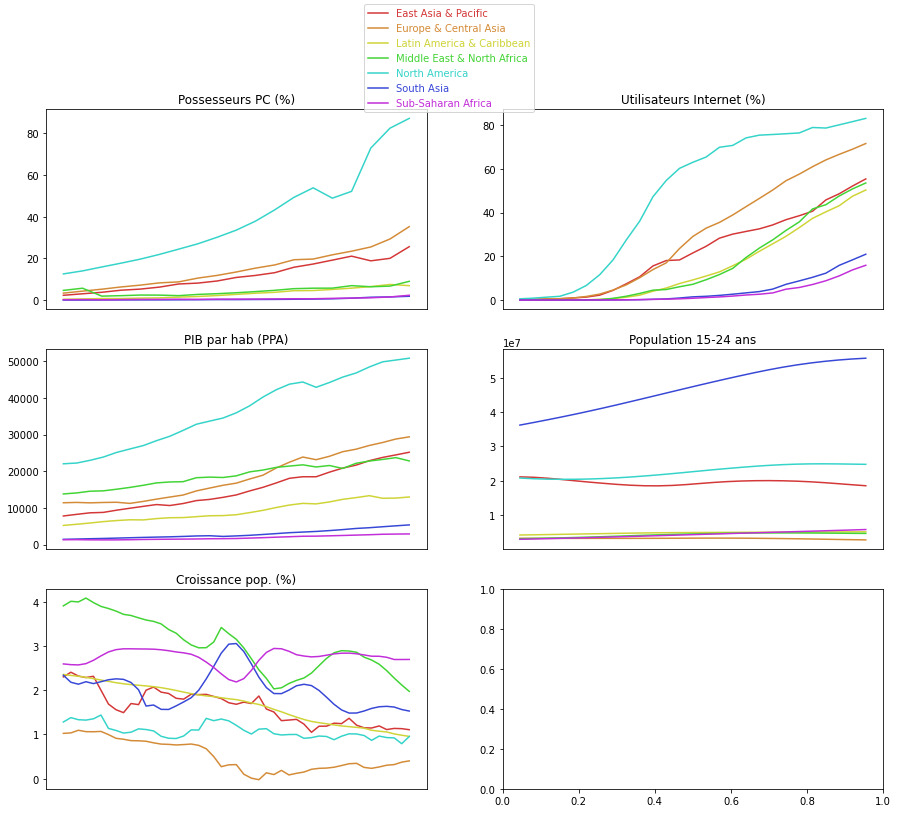

In [39]:
indicator_analysis_data = indicator_analysis_base_data.copy(deep=True)

#Calcul des moyennes
indicator_analysis_data = (indicator_analysis_data
                           .drop(columns=["Country Code"], errors="ignore")
                           .groupby(["Region", "Indicator Code"])
                           .mean()).reset_index().drop(columns=["index"])

colors = ["#d43737", "#d48b37", "#cfd437", "#42d435", "#35d4c9", "#3848d6", "#c22ed9"]
legend = {}

#Traçage du résultat sous forme de graphe
x_ticks = []
x_ticks_labels = []
for column_name in indicator_analysis_data.columns:
    if re.match('r/^\d{4}$/', column_name):
        x_ticks.append(int(year))
        if year.endswith('0'):
            x_ticks_labels.append(str(year))
        else:
            x_ticks_labels.append("")
        
indicators = indicator_analysis_data["Indicator Code"].unique()
fig10, axes = plt.subplots(nrows=math.ceil(len(indicators)/2), ncols=2, figsize=(15,5*len(indicators)/2))
i = 0
for indicator in indicators:
    subdata = indicator_analysis_data[indicator_analysis_data["Indicator Code"] == indicator]\
                .dropna(how="any", axis=1)\
                .drop(columns=["Indicator Code"])\
                .set_index("Region")
    row_number = 0
    for row in subdata.iterrows():
        axes[math.floor(i/2), i%2].title.set_text(indicators_names[indicator])
        axes[math.floor(i/2), i%2].set_xticks(x_ticks)
        axes[math.floor(i/2), i%2].set_xticklabels(x_ticks_labels)
        axes[math.floor(i/2), i%2].plot(subdata.columns, subdata.iloc[row_number].values, color=colors[row_number])    
        
        # Storing the association serie/color for the legend
        legend[subdata.index[row_number]] = colors[row_number]
        row_number += 1
    i+=1

    
    
fig10.legend(legend.keys(), labelcolor=legend.values(), loc="upper center")

### XI-Mise en place d'un score pour les pays 

In [42]:
#Reference du country code
REF_COUNTRY_CODE = "FRA"

def calculate_scores(coefficients, plot=False, score_name=None, return_index=False):
    """ 
    Tracez un graphique 'bar plots' avec les scores calculés à l'aide des coefficients donnés
    
    Paramètres:
    coefficient (dict) : dictionnaire de nom_colonne : coefficient
    
    Retour:
    DataFrame : les scores triés par ordre descendant (DESC) ou la liste des index triés
    
    """
    
    #Nous travaillerons avec une copie des données 
    scoring_data = final_indicators_values.copy(deep=True)
    score_column_name = "Score"

    #Diviser toutes les colonnes par sa valeur maximale pour avoir des valeurs [0;1]
    scoring_data.iloc[:,:-1] = scoring_data.iloc[:,:-1].apply(lambda x: x / x.max())
    
    #Pour chaque ligne du dataframe, nous calculons le score
    for country_code, row in scoring_data.iterrows():
        score = 0
        for column, coef in coefficients.items():
            score += row[column] * coef
        scoring_data.at[country_code, score_column_name] = score

   
    #Diviser par le score du pays de référence pour obtenir facilement les pays au potentiel le plus élevé
    ref_score = scoring_data.loc[REF_COUNTRY_CODE][score_column_name]
    scoring_data[score_column_name] = scoring_data[score_column_name] / ref_score

     #Trier les résultats par valeur de score descendante    
    scoring_data = scoring_data.sort_values(score_column_name, ascending=False)
    subset = scoring_data[score_column_name].to_frame()
    
    #Renommer la colonne de score si demandé
    if score_name != None:
        subset = subset.rename(columns={score_column_name: score_name})
        score_column_name = score_name

    # Renvoyer le résultat et tracer le résultat sous forme de graphe si demandé
    if plot:
        plt.xticks(rotation = 90)
        plt.bar(scoring_data["Country Name"], subset[score_column_name], color="goldenrod", edgecolor="#333333")

    if return_index:
        subset = subset.astype("string")
        for country_code, row in subset.iterrows():
            subset.at[country_code, score_column_name] = country_code
        subset = subset.reset_index().drop(columns=["Country Code"])
        
    return subset

### XI-1-Classement des pays avec des coefficients égaux (référence) 

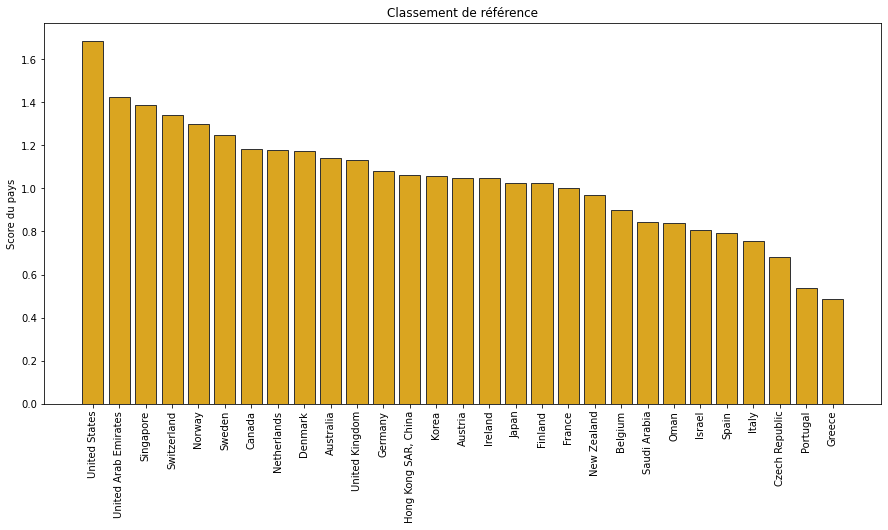

In [43]:
fig8 = plt.figure(figsize=(15,7))
plt.title("Classement de référence")
plt.ylabel("Score du pays")

scores = calculate_scores({
    'Utilisateurs Internet (%)': 1,
    'PIB par hab (PPA)': 1,
    'Population 15-24 ans': 1,
    'Croissance pop. (%)': 1,
    'Possesseurs PC (%)': 1
}, plot=True)

### XI-2-Impact de la modification des pondérations  

In [46]:
#Étape 1 : nous générons toutes les possibilités d'indicateur/poids possibles
indicators = [
    'Utilisateurs Internet (%)',
    'PIB par hab (PPA)',
    'Population 15-24 ans',
    'Croissance pop. (%)',
    'Possesseurs PC (%)'
]
weights = [3,2]

all_coefficients = []
for combination in itertools.permutations(indicators, len(weights)):
    new_coefficients = {}
    for index, indicator in enumerate(indicators):
        if indicator in combination:
            new_coefficients[indicator] = weights[combination.index(indicator)]
        else: 
            new_coefficients[indicator] = 1
    all_coefficients.append(new_coefficients)
    
print("Les " + str(len(all_coefficients)) + " cas possibles ont été générés")

j=0
for coefficients in all_coefficients:
    print("\n")
    print("Classement #" + str(j) + " : ")
    for indic, coef in coefficients.items():
        if coef > 1:
            print(str(indic) + " : " + str(coef))
    
    j += 1

Les 20 cas possibles ont été générés


Classement #0 : 
Utilisateurs Internet (%) : 3
PIB par hab (PPA) : 2


Classement #1 : 
Utilisateurs Internet (%) : 3
Population 15-24 ans : 2


Classement #2 : 
Utilisateurs Internet (%) : 3
Croissance pop. (%) : 2


Classement #3 : 
Utilisateurs Internet (%) : 3
Possesseurs PC (%) : 2


Classement #4 : 
Utilisateurs Internet (%) : 2
PIB par hab (PPA) : 3


Classement #5 : 
PIB par hab (PPA) : 3
Population 15-24 ans : 2


Classement #6 : 
PIB par hab (PPA) : 3
Croissance pop. (%) : 2


Classement #7 : 
PIB par hab (PPA) : 3
Possesseurs PC (%) : 2


Classement #8 : 
Utilisateurs Internet (%) : 2
Population 15-24 ans : 3


Classement #9 : 
PIB par hab (PPA) : 2
Population 15-24 ans : 3


Classement #10 : 
Population 15-24 ans : 3
Croissance pop. (%) : 2


Classement #11 : 
Population 15-24 ans : 3
Possesseurs PC (%) : 2


Classement #12 : 
Utilisateurs Internet (%) : 2
Croissance pop. (%) : 3


Classement #13 : 
PIB par hab (PPA) : 2
Croissance pop

In [47]:
#Etape 2 : nous générons tous les classement
reference_coefficients = {
    'Utilisateurs Internet (%)': 1,
    'PIB par hab (PPA)': 1,
    'Population 15-24 ans': 1,
    'Croissance pop. (%)': 1,
    'Possesseurs PC (%)': 1
}

#Initialisons d'une trame de données avec tous les coefficients de pondération à 1
rankings = calculate_scores(reference_coefficients, score_name="Reference score", return_index=True)
top_10 = rankings["Reference score"].head(15).tolist()

for index, coefficient_case in enumerate(all_coefficients):
    weighted_scores = calculate_scores(coefficient_case, 
                                       score_name="CASE_" + str(index), 
                                       return_index=True)
    rankings = rankings.merge(weighted_scores, left_index=True, right_index=True)


#Colorier le dataframe pour mettre en avant le top 10 du classement de référence et voir les différences
rankings_colors = rankings.copy(deep=True)
rankings_colors = rankings_colors.isin(top_10)

def color_cells(value):
    if value == True:
        return 'text-align:center; width: 120px; background-color:#ffefe0; font-weight:bold; border:1px solid #fac28e;'
    else:
        return 'text-align:center; width: 120px; '

print("Les couleurs nous permettent de visualiser que le Top 10 de référence ne changent pas beaucoup")
rankings.style.apply(lambda x: rankings_colors.applymap(color_cells), axis=None)

Les couleurs nous permettent de visualiser que le Top 10 de référence ne changent pas beaucoup


,Reference score,CASE_0,CASE_1,CASE_2,CASE_3,CASE_4,CASE_5,CASE_6,CASE_7,CASE_8,CASE_9,CASE_10,CASE_11,CASE_12,CASE_13,CASE_14,CASE_15,CASE_16,CASE_17,CASE_18,CASE_19
0,USA,USA,USA,ARE,USA,USA,USA,ARE,USA,USA,USA,USA,USA,ARE,ARE,ARE,ARE,USA,USA,USA,USA
1,ARE,NOR,NOR,USA,CHE,SGP,SGP,SGP,SGP,ARE,ARE,ARE,CHE,USA,SGP,USA,USA,CHE,CHE,CHE,CHE
2,SGP,ARE,CHE,NOR,SWE,ARE,ARE,USA,CHE,CHE,SGP,SGP,SGP,SGP,USA,SGP,SGP,SWE,SGP,SGP,SGP
3,CHE,SGP,SWE,SGP,NOR,NOR,NOR,NOR,ARE,NOR,CHE,CHE,SWE,NOR,NOR,CHE,CHE,SGP,SWE,SWE,SWE
4,NOR,CHE,ARE,CHE,SGP,CHE,CHE,CHE,NOR,SGP,NOR,NOR,CAN,CHE,CHE,OMN,NOR,NOR,NOR,CAN,ARE
5,SWE,SWE,SGP,SWE,DNK,SWE,SWE,SWE,SWE,SWE,SWE,GBR,NOR,SWE,OMN,NOR,SWE,DNK,DNK,NOR,NOR
6,CAN,NLD,NLD,DNK,NLD,NLD,NLD,NLD,NLD,GBR,CAN,CAN,GBR,CAN,SWE,AUS,CAN,NLD,CAN,DNK,CAN
7,NLD,DNK,DNK,NLD,CAN,DNK,CAN,CAN,DNK,JPN,DEU,SWE,NLD,AUS,AUS,CAN,AUS,CAN,NLD,NLD,DNK
8,DNK,CAN,GBR,CAN,GBR,CAN,DNK,AUS,CAN,CAN,GBR,AUS,DEU,DNK,CAN,SWE,DNK,AUS,ARE,AUS,NLD
9,AUS,GBR,CAN,GBR,ARE,AUS,DEU,DNK,AUS,DEU,JPN,JPN,DNK,NLD,NLD,GBR,NLD,GBR,AUS,GBR,AUS


In [48]:
#Maintenant on part de ce tableau et on calcule le score de chaque pays:

scores = {}
MAX_SCORE = 15

for index, row in enumerate(rankings.values.tolist()):
    for country in row:
        if not country in scores:
            scores[country] = 0
        score = MAX_SCORE - index
        scores[country] += max([score, 0])

#Trier par valeur de score descendante
scores = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))

scores

{'USA': 307,
 'SGP': 268,
 'CHE': 260,
 'NOR': 242,
 'ARE': 238,
 'SWE': 220,
 'CAN': 173,
 'NLD': 155,
 'DNK': 143,
 'AUS': 123,
 'GBR': 115,
 'DEU': 64,
 'KOR': 41,
 'HKG': 39,
 'OMN': 33,
 'IRL': 29,
 'JPN': 27,
 'AUT': 18,
 'FIN': 11,
 'SAU': 9,
 'FRA': 5,
 'NZL': 0,
 'BEL': 0,
 'ESP': 0,
 'ITA': 0,
 'ISR': 0,
 'CZE': 0,
 'PRT': 0,
 'GRC': 0}

### XII-Conclusion 

<BarContainer object of 21 artists>

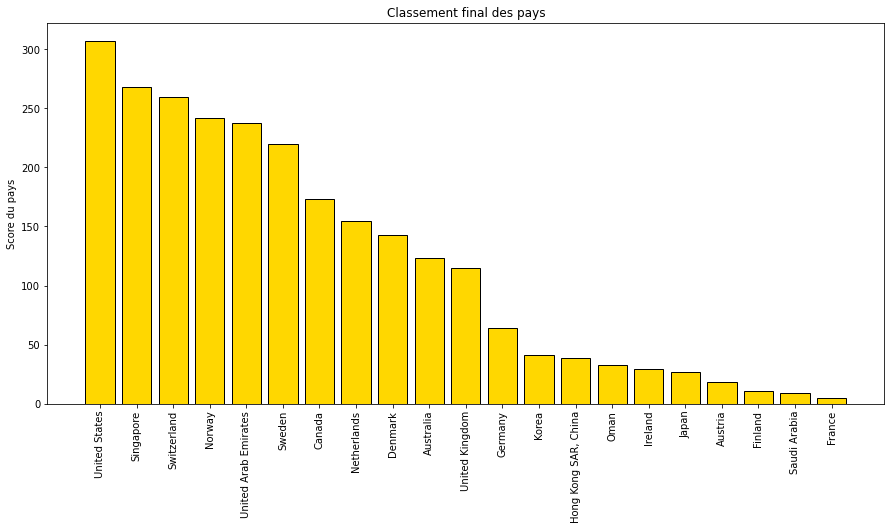

In [51]:
#Il ne nous reste plus qu'à tracer les scores sur un graphiques:

#Renommer le code pays par le nom du pays et ne conserver que les scores supérieur à 0
named_scores = {}
for country_code, score in scores.items():
    if score > 0:
        country_name = country_df[country_df["Country Code"] == country_code]["Short Name"].values[0]
        named_scores[country_name] = score

fig9 = plt.figure(figsize=(15,7))
plt.xticks(rotation = 90)
plt.title("Classement final des pays")
plt.ylabel("Score du pays")
plt.bar(named_scores.keys(), named_scores.values(), color="gold", edgecolor="black")

### XIII-Analyse antérieure

In [79]:
def dataset_drop_unpopulated_variables(data, limit):
    '''fonction qui supprime les variables de la df avec des données manquantes
        la limite est un float entre 0 and 100'''
    data_temp = pd.DataFrame()
    data_temp = data
    for column in data.columns:        
        var_type = data[column].dtypes
        percent_missing =  missing_cells_percent(data[column])
        if var_type == 'float64' and float(missing_cells_percent(data[column]))>limit:
            print('Dropping variable {} from  {}'.format(column,namestr(data, globals())))
            data_temp = data_temp.drop([column], axis=1)
    return data_temp

In [80]:
def data_series(data,series, country):
     '''fonction qui prend des données d'entrée, un pays et une série et renvoie un dictionnaire'''
    dic = {}
    data = data[(data['Indicator Code'] == series) & (data['Country Code'] == country)]
    for date in range(1970,2020): #sur site mention de derniere mise à jour le 07/2021, donc par precaution on prend année 2020, qui correspondent à des données réelles et non des éstimations
        dic[date] = data[str(date)]    
    return dic
 
def data_series_last(data,series,country,last):
    '''fonction qui prend en entrée des données, un pays, une série et une date de fin et renvoie un dictionnaire'''
    annual_data = []
    data = data[(data['Indicator Code'] == series) & (data['Country Code'] == country)]
    for date in range(1970,last):
        annual_data.append(float(data[str(date)]))    
    return annual_data

In [81]:
#Choix des indicateurs
topics_of_interest = ['Internet','high-school','university','15-19','20-24', 'population growth', 'computers', 'household', 'funding', 'GDP', 'income']
filtered_series = series_df[series_df['Long definition'].str.contains('|'.join(topics_of_interest))]

print("Number of series related to keywords {} of interest were selected : {}".format(topics_of_interest,len(filtered_series)))
print('-------------------------------------------------')
print("Topics selected : {}".format(filtered_series['Topic'].unique()))
print('-------------------------------------------------')
indicators = pd.DataFrame(columns=['Series Code','Long definition'])
for serie in filtered_series.iterrows():
    indicators = indicators.append(pd.DataFrame([[serie[1]['Series Code'],serie[1]['Long definition']]],columns=['Series Code','Long definition']))
indicators

Number of series related to keywords ['Internet', 'high-school', 'university', '15-19', '20-24', 'population growth', 'computers', 'household', 'funding', 'GDP', 'income'] of interest were selected : 329
-------------------------------------------------
Topics selected : ['Attainment' 'Education Equality' 'Infrastructure: Communications'
 'Learning Outcomes'
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators'
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators'
 'Economic Policy & Debt: Purchasing power parity'
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
 'Teachers' 'Expenditures' 'Health: Population: Dynamics']
-------------------------------------------------


,Series Code,Long definition
0,BAR.NOED.1519.FE.ZS,Percentage of female population age 15-19 with...
0,BAR.NOED.1519.ZS,Percentage of population age 15-19 with no edu...
0,BAR.NOED.2024.FE.ZS,Percentage of female population age 20-24 with...
0,BAR.NOED.2024.ZS,Percentage of population age 20-24 with no edu...
0,BAR.POP.1519,"Population in thousands, age 15-19, total is t..."
...,...,...
0,UIS.XUNIT.USCONST.3.FSGOV,"Average total (current, capital and transfers)..."
0,UIS.XUNIT.USCONST.4.FSGOV,"Average total (current, capital and transfers)..."
0,UIS.XUNIT.USCONST.56.FSGOV,"Average total (current, capital and transfers)..."
0,XGDP.23.FSGOV.FDINSTADM.FFD,"Total general (local, regional and central) go..."


In [82]:
#Selection des données en fonction des indicateurs mentionnés ci_dessus
dataset_filtered = data_df[data_df['Indicator Code'].str.contains('|'.join(filtered_series['Series Code']))]
dataset_filtered.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
133,Arab World,ARB,Annual statutory teacher salaries in public in...,OECD.TSAL.2.E10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,Arab World,ARB,Annual statutory teacher salaries in public in...,OECD.TSAL.2.E15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,Arab World,ARB,Annual statutory teacher salaries in public in...,OECD.TSAL.2.E0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,Arab World,ARB,Annual statutory teacher salaries in public in...,OECD.TSAL.2.ETOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,Arab World,ARB,Annual statutory teacher salaries in public in...,OECD.TSAL.0.E10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#Raptriement des colonnes contenant les information dont on a besoin à partir de la table country_df
country_df_c = country_df_c[['Country Code', 'Region','Income Group']]
#Faire une jointure
final_dataset = pd.merge(dataset_filtered, country_df_c, how = "left", on = ["Country Code"])
#Rearrangement des colonnes pour une meilleur lisibilité
cols = dataset_filtered.columns
colonnes = list(['Region','Income Group'])
joined_list = [*colonnes, *cols]
final_dataset = final_dataset[joined_list]

In [84]:
final_dataset.head(5)

,Region,Income Group,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,NaN,NaN,Arab World,ARB,Annual statutory teacher salaries in public in...,OECD.TSAL.2.E10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Arab World,ARB,Annual statutory teacher salaries in public in...,OECD.TSAL.2.E15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Arab World,ARB,Annual statutory teacher salaries in public in...,OECD.TSAL.2.E0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Arab World,ARB,Annual statutory teacher salaries in public in...,OECD.TSAL.2.ETOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Arab World,ARB,Annual statutory teacher salaries in public in...,OECD.TSAL.0.E10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
final_dataset.sample(5)

,Region,Income Group,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
17680,East Asia & Pacific,High income: nonOECD,Brunei Darussalam,BRN,"UIS: Total net attendance rate, lower secondar...",UIS.NART.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72126,Sub-Saharan Africa,Low income,Togo,TGO,UIS: Rate of out-of-school children of primary...,UIS.ROFST.H.1.URB.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.1,NaN,NaN,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2565,NaN,NaN,Heavily indebted poor countries (HIPC),HPC,UIS: Rate of out-of-school adolescents of lowe...,UIS.ROFST.H.2.URB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36089,East Asia & Pacific,High income: nonOECD,"Hong Kong SAR, China",HKG,Annual statutory teacher salaries in public in...,OECD.TSAL.1.E15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41148,Sub-Saharan Africa,Low income,Kenya,KEN,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.1,0.1,0.1,0.2,0.3,0.3,0.4,0.5,0.5,0.6,0.9,1.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
final_dataset.tail(5)

,Region,Income Group,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
79371,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,"UIS: Total net attendance rate, lower secondar...",UIS.NART.2.Q2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.9,NaN,NaN,NaN,NaN,75.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79372,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,"UIS: Total net attendance rate, lower secondar...",UIS.NART.2.URB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,85.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79373,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,"UIS: Total net attendance rate, lower secondar...",UIS.NART.2.URB.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.9,NaN,NaN,NaN,NaN,84.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79374,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,"UIS: Total net attendance rate, lower secondar...",UIS.NART.2.URB.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79375,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,"UIS: Total net attendance rate, lower secondar...",UIS.NART.2.URB.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.1,NaN,NaN,NaN,NaN,87.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
def namestr(obj, namespace):
    '''fonction qui renvoie le nom de la variable'''
    return [name for name in namespace if namespace[name] is obj]

In [88]:
def nb_columns(data):
    '''fonction qui prend un dataframe en entrée et renvoie le nombre de colonnes en sortie'''
    return len(data.columns)

In [89]:
def nb_lines(data):
    '''fonction qui prend un dataframe en entrée et renvoie le nombre de lignes en sortie'''
    return len(data)

In [90]:
def missing_cells(data):
    '''fonction qui prend un dataframe en entrée et renvoie le nombre de cellules manquantes en sortie'''
    return data.isna().sum().sum()

In [91]:
def missing_cells_percent(data):
    '''fonction qui prend un dataframe en entrée et renvoie le pourcentage de cellules manquantes en sortie'''
    return data.isna().sum().sum()/(data.size)

In [92]:
def count_duplicates_rows(data):
    '''fonction qui prend un dataframe en entrée et renvoie le nombre de lignes en doublons en sorties'''
    return len(data)-len(data.drop_duplicates())

In [93]:
def count_duplicates_rows_percent(data):
    '''fonction qui prend un dataframe en entrée et renvoie le pourcentage de lignes en doublons en sorties'''
    return count_duplicates_rows(data)/nb_lines(data)

In [94]:
def data_set_overview(data):    #à revoir avec fonction normal
    '''fonction qui prend un dataframe en entrée et renvoie un dataframe contenant le nombre: de lignes, de colonnes, de cellules manquantes et de lignes en doublons'''
    print('--------------------------------------------------------------------------')
    print('Data : {}'.format(namestr(data, globals())))
    print('Number of variables : {}'.format(nb_columns(data)))
    print('Number of observations : {}'.format(nb_lines(data)))
    print('Missing cells : {}'.format(missing_cells(data)))
    print('Missing cells in % : {:.2%}'.format(missing_cells_percent(data)))
    print('Duplicate rows : {}'.format(count_duplicates_rows(data)))
    print('Duplicate rows in % : {:.2%}'.format(count_duplicates_rows_percent(data)))
    return None

In [95]:
#data_set_overview(final_dataset)

In [96]:
inf_final_dataset = desc_bis(final_dataset).append(final_dataset.describe(include = 'all'))
evalNull(inf_final_dataset)
inf_final_dataset

Nbe valeurs 'null' : 5019509
Nbe valeurs non 'null' : 695563
Nbe total cases : 5715072
% total valeurs 'null' : 87.8%


,Region,Income Group,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Type,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null,9184,9184,0,0,0,0,71369,78263,78256,78251,78250,71309,78221,78196,78196,78179,71202,78087,78062,78063,78044,71116,78008,77997,77932,77908,69480,76575,76432,76393,76320,69231,75956,76010,74789,74238,66702,73719,73619,72758,72356,64218,68696,71543,72288,71988,63812,70496,71998,72376,74254,75382,76459,79376,79376,79376,79376,79376,79376,79376,79376,79376,79376,79376,79376,79376,79376,79376,79376,79376,79376,79376
count,70192,70192,79376,79376,79376,79376,8007.0,1113.0,1120.0,1125.0,1126.0,8067.0,1155.0,1180.0,1180.0,1197.0,8174.0,1289.0,1314.0,1313.0,1332.0,8260.0,1368.0,1379.0,1444.0,1468.0,9896.0,2801.0,2944.0,2983.0,3056.0,10145.0,3420.0,3366.0,4587.0,5138.0,12674.0,5657.0,5757.0,6618.0,7020.0,15158.0,10680.0,7833.0,7088.0,7388.0,15564.0,8880.0,7378.0,7000.0,5122.0,3994.0,2917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,7,5,242,242,328,328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Europe & Central Asia,Upper middle income,Arab World,ARB,Annual statutory teacher salaries in public in...,OECD.TSAL.2.E10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,18696,18040,328,328,242,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,17811187405.2,135687125778.0,145920117425.4,161163639317.5,171264468090.5,25027445158.7,185876321810.9,194879467034.1,212307230139.7,228545708734.8,35783568231.1,230448289813.7,225778461990.1,230004228709.6,235149741412.9,39579672221.0,263388269598.7,284241083525.5,294795839835.6,305559665317.2,114174995401.1,417576088773.7,411662976894.7,417498550460.1,426762675209.2,136257825787.0,420920515266.9,442326013698.7,332159771515.5,307918568850.9,131336298752.1,302298199198.0,308091165328.0,285453487905.8,291659479770.1,144348068926.5,221296521517.3,328072083432.7,384794108007.7,364435997928.4,185280637367.1,348202213803.6,434341129453.8,476381986202.1,594966564484.9,772268783903.3,1091473683627.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,363705737160.2,1011483174110.7,1070292846359.2,1147035639867.7,1178303487316.5,451760050592.5,1249327160975.6,1298692866157.3,1380926404090.3,1458963348777.2,587051748198.9,1488511466212.0,1474931838229.2,1512043919595.6,1566745314431.2,661192495479.5,1732810680148.6,1851149358788.8,1944920349942.9,2008721728938.6,1295132941

In [97]:
golden_regions_var = final_dataset.groupby(['Region','Indicator Code']).mean(numeric_only=True)
golden_regions_var

1970  1971  1972  1973  \
Region              Indicator Code                                         
East Asia & Pacific BAR.NOED.1519.FE.ZS           18.2   NaN   NaN   NaN   
                    BAR.NOED.1519.ZS              15.9   NaN   NaN   NaN   
                    BAR.NOED.2024.FE.ZS           22.5   NaN   NaN   NaN   
                    BAR.NOED.2024.ZS              17.6   NaN   NaN   NaN   
                    BAR.POP.1519                6421.3   NaN   NaN   NaN   
...                                                ...   ...   ...   ...   
Sub-Saharan Africa  UIS.XUNIT.USCONST.3.FSGOV      NaN   NaN   NaN   NaN   
                    UIS.XUNIT.USCONST.4.FSGOV      NaN   NaN   NaN   NaN   
                    UIS.XUNIT.USCONST.56.FSGOV     NaN   NaN   NaN   NaN   
                    XGDP.23.FSGOV.FDINSTADM.FFD    NaN   NaN   NaN   NaN   
                    XGDP.56.FSGOV.FDINSTADM.FFD    NaN   NaN   NaN   NaN   

                                                 1974   1975  1976  1977  \
Region              Indicator Code                                         
East Asia & Pacific BAR.NOED.1519.FE.ZS           NaN   15.2   NaN   NaN   
                    BAR.NOED.1519.ZS              NaN   13.5   NaN   NaN   
                    BAR.NOED.2024.FE.ZS           NaN   18.3   NaN   NaN   
                    BAR.NOED.2024.ZS              NaN   15.1   NaN   NaN   
                    BAR.POP.1519                  NaN 6516.1   NaN   NaN   
...                                               ...    ...   ...   ...   
Sub-Saharan Africa  UIS.XUNIT.USCONST.3.FSGOV     NaN    NaN   NaN   NaN   
                    UIS.XUNIT.USCONST.4.FSGOV     NaN    NaN   NaN   NaN   
                    UIS.XUNIT.USCONST.56.FSGOV    NaN    NaN   NaN   NaN   
                    XGDP.23.FSGOV.FDINSTADM.FFD   NaN    NaN   NaN   NaN   
                    XGDP.56.FSGOV.FDINSTADM.FFD   NaN    NaN   NaN   NaN   

                                                 1978  1979   1980  1981  \
Region              Indicator Code                                         
East Asia & Pacific BAR.NOED.1519.FE.ZS           NaN   NaN   12.3   NaN   
                    BAR.NOED.1519.ZS              NaN   NaN   10.9   NaN   
                    BAR.NOED.2024.FE.ZS           NaN   NaN   14.3   NaN   
                    BAR.NOED.2024.ZS              NaN   NaN   11.8   NaN   
                    BAR.POP.1519                  NaN   NaN 7749.7   NaN   
...                                               ...   ...    ...   ...   
Sub-Saharan Africa  UIS.XUNIT.USCONST.3.FSGOV     NaN   NaN    NaN   NaN   
                    UIS.XUNIT.USCONST.4.FSGOV     NaN   NaN    NaN   NaN   
                    UIS.XUNIT.USCONST.56.FSGOV    NaN   NaN    NaN   NaN   
                    XGDP.23.FSGOV.FDINSTADM.FFD   NaN   NaN    NaN   NaN   
                    XGDP.56.FSGOV.FDINSTADM.FFD   NaN   NaN    NaN   NaN   

                                                 1982  1983  1984   1985  \
Region              Indicator Code                                         
East Asia & Pacific BAR.NOED.1519.FE.ZS           NaN   NaN   NaN   11.0   
                    BAR.NOED.1519.ZS              NaN   NaN   NaN    9.8   
                    BAR.NOED.2024.FE.ZS           NaN   NaN   NaN   14.7   
                    BAR.NOED.2024.ZS              NaN   NaN   NaN   12.2   
                    BAR.POP.1519                  NaN   NaN   NaN 9040.4   
...                                               ...   ...   ...    ...   
Sub-Saharan Africa  UIS.XUNIT.USCONST.3.FSGOV     NaN   NaN   NaN    NaN   
                    UIS.XUNIT.USCONST.4.FSGOV     NaN   NaN   NaN    NaN   
                    UIS.XUNIT.USCONST.56.FSGOV    NaN   NaN   NaN    NaN   
                    XGDP.23.FSGOV.FDINSTADM.FFD   NaN   NaN   NaN    NaN   
                    XGDP.56.FSGOV.FDINSTADM.FFD   NaN   NaN   NaN    NaN   

                                                 1986  1987  1988  1989  \
Region             

In [98]:
golden_source = final_dataset.groupby(['Region','Country Name','Indicator Code']).mean()
golden_source

1970  1971  \
Region              Country Name   Indicator Code                            
East Asia & Pacific American Samoa BAR.NOED.1519.FE.ZS           NaN   NaN   
                                   BAR.NOED.1519.ZS              NaN   NaN   
                                   BAR.NOED.2024.FE.ZS           NaN   NaN   
                                   BAR.NOED.2024.ZS              NaN   NaN   
                                   BAR.POP.1519                  NaN   NaN   
...                                                              ...   ...   
Sub-Saharan Africa  Zimbabwe       UIS.XUNIT.USCONST.3.FSGOV     NaN   NaN   
                                   UIS.XUNIT.USCONST.4.FSGOV     NaN   NaN   
                                   UIS.XUNIT.USCONST.56.FSGOV    NaN   NaN   
                                   XGDP.23.FSGOV.FDINSTADM.FFD   NaN   NaN   
                                   XGDP.56.FSGOV.FDINSTADM.FFD   NaN   NaN   

                                                                1972  1973  \
Region              Country Name   Indicator Code                            
East Asia & Pacific American Samoa BAR.NOED.1519.FE.ZS           NaN   NaN   
                                   BAR.NOED.1519.ZS              NaN   NaN   
                                   BAR.NOED.2024.FE.ZS           NaN   NaN   
                                   BAR.NOED.2024.ZS              NaN   NaN   
                                   BAR.POP.1519                  NaN   NaN   
...                                                              ...   ...   
Sub-Saharan Africa  Zimbabwe       UIS.XUNIT.USCONST.3.FSGOV     NaN   NaN   
                                   UIS.XUNIT.USCONST.4.FSGOV     NaN   NaN   
                                   UIS.XUNIT.USCONST.56.FSGOV    NaN   NaN   
                                   XGDP.23.FSGOV.FDINSTADM.FFD   NaN   NaN   
                                   XGDP.56.FSGOV.FDINSTADM.FFD   NaN   NaN   

                                                                1974  1975  \
Region              Country Name   Indicator Code                            
East Asia & Pacific American Samoa BAR.NOED.1519.FE.ZS           NaN   NaN   
                                   BAR.NOED.1519.ZS              NaN   NaN   
                                   BAR.NOED.2024.FE.ZS           NaN   NaN   
                                   BAR.NOED.2024.ZS              NaN   NaN   
                                   BAR.POP.1519                  NaN   NaN   
...                                                              ...   ...   
Sub-Saharan Africa  Zimbabwe       UIS.XUNIT.USCONST.3.FSGOV     NaN   NaN   
                                   UIS.XUNIT.USCONST.4.FSGOV     NaN   NaN   
                                   UIS.XUNIT.USCONST.56.FSGOV    NaN   NaN   
                                   XGDP.23.FSGOV.FDINSTADM.FFD   NaN   NaN   
                                   XGDP.56.FSGOV.FDINSTADM.FFD   NaN   NaN   

                                                                1976  1977  \
Region              Country Name   Indicator Code                            
East Asia & Pacific American Samoa BAR.NOED.1519.FE.ZS           NaN   NaN   
                                   BAR.NOED.1519.ZS              NaN   NaN   
                                   BAR.NOED.2024.FE.ZS           NaN   NaN   
                                   BAR.NOED.2024.ZS              NaN   NaN   
                                   BAR.POP.1519                  NaN   NaN   
...                                                              ...   ...   
Sub-Saharan Africa  Zimbabwe       UIS.XUNIT.USCONST.3.FSGOV     NaN   NaN   
                                   UIS.XUNIT.USCONST.4.FSGOV     NaN   NaN   
                                   UIS.XUNIT.USCONST.56.FSGOV    NaN   NaN   
                                   XGDP.23.FSGOV.FDINSTADM.FFD   NaN   NaN   
                                   XGDP.56.FSGOV.FDINSTADM.FFD   NaN   NaN   

    

In [99]:
data_set_overview(golden_source)

--------------------------------------------------------------------------
Data : ['_', 'golden_source', '_98']
Number of variables : 66
Number of observations : 70192
Missing cells : 4407854
Missing cells in % : 95.15%
Duplicate rows : 40261
Duplicate rows in % : 57.36%


In [100]:
def dataset_variables_overview(data):
    ''' fonction qui prend un dataframe en entrée et retourne un résumé contenant le nom de la variable, le type, les valeurs distinctes, les valeurs manquantes et une analyse statistiques
    pour les variables numériques '''
    print('--------------------------------------------------------------------------')
    print('Data : {}'.format(namestr(data, globals())))
    print('--------------------------------------------------------------------------')
    df = pd.DataFrame(columns=['Variable name','Variable type','Distinct','% distinct','Missing','% missing', 'Mean', 'Median', 'Stdev', 'min','25%','75%','max'])
    for column in data.columns:
        var_type = data[column].dtypes
        distinct = len(data[column].unique())
        percent_distinct = len(data[column].unique())/len(data[column])
        missing = missing_cells(data[column])
        percent_missing = missing_cells_percent(data[column])
        if var_type != 'object':       
            df = df.append(pd.DataFrame([[column,var_type,distinct,percent_distinct,missing,percent_missing,data[column].mean(),data[column].median(),
                                          data[column].std(ddof=0),data[column].min(),data[column].quantile(0.25),data[column].quantile(0.75),data[column].max()]], columns=['Variable name','Variable type','Distinct','% distinct','Missing','% missing', 'Mean', 'Median', 'Stdev', 'min','25%','75%','max']))
        else:            
            df = df.append(pd.DataFrame([[column,var_type,distinct,percent_distinct,missing,percent_missing,'','','','','','','']], columns=['Variable name','Variable type','Distinct','% distinct','Missing','% missing', 'Mean', 'Median', 'Stdev', 'min','25%','75%','max']))
               
    return df

In [101]:
dataset_variables_overview(golden_source)

--------------------------------------------------------------------------
Data : ['_', 'golden_source', '_98']
--------------------------------------------------------------------------


,Variable name,Variable type,Distinct,% distinct,Missing,% missing,Mean,Median,Stdev,min,25%,75%,max
0,1970,float64,3617,0.1,62334,0.9,2884406104.5,5.8,67587286838.3,-1.4,1.0,39.1,4779684394200.0
0,1971,float64,927,0.0,69228,1.0,24891423985.8,1735.3,199322380857.5,-1.6,4.6,1164289106.0,4937197781100.0
0,1972,float64,935,0.0,69222,1.0,26777122634.3,1983.4,210694620962.9,-3.1,5.3,1275966757.6,5197055474100.0
0,1973,float64,943,0.0,69217,1.0,29513055307.8,2241.4,224522156886.1,-4.0,5.5,1411756815.4,5490331802900.0
0,1974,float64,950,0.0,69216,1.0,31252532332.2,2644.3,226587102460.9,-4.2,5.5,1666046188.5,5461938301500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2085,float64,1,0.0,70192,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2090,float64,1,0.0,70192,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2095,float64,1,0.0,70192,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2100,float64,1,0.0,70192,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
dataset_variables_overview(final_dataset)

--------------------------------------------------------------------------
Data : ['final_dataset']
--------------------------------------------------------------------------


,Variable name,Variable type,Distinct,% distinct,Missing,% missing,Mean,Median,Stdev,min,25%,75%,max
0,Region,object,8,0.0,9184,0.1,,,,,,,
0,Income Group,object,6,0.0,9184,0.1,,,,,,,
0,Country Name,object,242,0.0,0,0.0,,,,,,,
0,Country Code,object,242,0.0,0,0.0,,,,,,,
0,Indicator Name,object,328,0.0,0,0.0,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2085,float64,1,0.0,79376,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2090,float64,1,0.0,79376,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2095,float64,1,0.0,79376,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2100,float64,1,0.0,79376,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#Grouper les indicateurs et transposition des données afin de pouvoir calculer les corrélations entre les indicateurs
source_df = final_dataset.groupby(['Indicator Code']).mean(numeric_only=True)
source_df

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Indicator Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BAR.NOED.1519.FE.ZS,29.6,NaN,NaN,NaN,NaN,25.9,NaN,NaN,NaN,NaN,22.9,NaN,NaN,NaN,NaN,19.8,NaN,NaN,NaN,NaN,16.6,NaN,NaN,NaN,NaN,15.5,NaN,NaN,NaN,NaN,14.1,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAR.NOED.1519.ZS,25.8,NaN,NaN,NaN,NaN,22.8,NaN,NaN,NaN,NaN,20.1,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,14.7,NaN,NaN,NaN,NaN,13.8,NaN,NaN,NaN,NaN,12.3,NaN,NaN,NaN,NaN,10.6,NaN,NaN,NaN,NaN,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAR.NOED.2024.FE.ZS,34.3,NaN,NaN,NaN,NaN,30.1,NaN,NaN,NaN,NaN,25.6,NaN,NaN,NaN,NaN,22.9,NaN,NaN,NaN,NaN,19.7,NaN,NaN,NaN,NaN,17.1,NaN,NaN,NaN,NaN,15.2,NaN,NaN,NaN,NaN,13.4,NaN,NaN,NaN,NaN,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAR.NOED.2024.ZS,29.4,NaN,NaN,NaN,NaN,25.3,NaN,NaN,NaN,NaN,21.5,NaN,NaN,NaN,NaN,19.2,NaN,NaN,NaN,NaN,16.5,NaN,NaN,NaN,NaN,14.7,NaN,NaN,NaN,NaN,13.1,NaN,NaN,NaN,NaN,11.4,NaN,NaN,NaN,NaN,9.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAR.POP.1519,2416.0,NaN,NaN,NaN,NaN,2614.4,NaN,NaN,NaN,NaN,2948.1,NaN,NaN,NaN,NaN,3248.0,NaN,NaN,NaN,NaN,3372.2,NaN,NaN,NaN,NaN,3360.0,NaN,NaN,NaN,NaN,3630.0,NaN,NaN,NaN,NaN,3895.8,NaN,NaN,NaN,NaN,3841.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UIS.XUNIT.USCONST.3.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6724.9,4865.8,4873.0,4894.4,5141.3,6395.5,6303.3,7039.2,6975.9,6679.1,6506.4,5866.6,5783.5,5799.8,4516.9,3059.1,1713.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UIS.XUNIT.USCONST.4.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8053.6,4882.0,3739.1,3348.7,6382.8,5183.3,5355.2,4863.1,5468.3,8885.9,7974.9,9301.7,5329.4,7737.7,7872.0,4271.6,5023.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UIS.XUNIT.USCONST.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.2,7942.4,7495.9,7247.8,7516.0,8430.1,6982.0,7002.2,7066.5,6952.7,6336.2,6251.5,5817.7,6681.9,5157.2,4455.9,3892.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#transposition des données pour le calcul de la correlation entre les indicateurs
year_series = source_df.transpose()
year_series

Indicator Code,BAR.NOED.1519.FE.ZS,BAR.NOED.1519.ZS,BAR.NOED.2024.FE.ZS,BAR.NOED.2024.ZS,BAR.POP.1519,BAR.POP.1519.FE,BAR.POP.2024,BAR.POP.2024.FE,BAR.PRM.CMPT.1519.FE.ZS,BAR.PRM.CMPT.1519.ZS,BAR.PRM.CMPT.2024.FE.ZS,BAR.PRM.CMPT.2024.ZS,BAR.PRM.ICMP.1519.FE.ZS,BAR.PRM.ICMP.1519.ZS,BAR.PRM.ICMP.2024.FE.ZS,BAR.PRM.ICMP.2024.ZS,BAR.PRM.SCHL.1519,BAR.PRM.SCHL.1519.FE,BAR.PRM.SCHL.2024,BAR.PRM.SCHL.2024.FE,BAR.SCHL.1519,BAR.SCHL.1519.FE,BAR.SCHL.2024,BAR.SCHL.2024.FE,BAR.SEC.CMPT.1519.FE.ZS,BAR.SEC.CMPT.1519.ZS,BAR.SEC.CMPT.2024.FE.ZS,BAR.SEC.CMPT.2024.ZS,BAR.SEC.ICMP.1519.FE.ZS,BAR.SEC.ICMP.1519.ZS,BAR.SEC.ICMP.2024.FE.ZS,BAR.SEC.ICMP.2024.ZS,BAR.SEC.SCHL.1519,BAR.SEC.SCHL.1519.FE,BAR.SEC.SCHL.2024,BAR.SEC.SCHL.2024.FE,BAR.TER.CMPT.1519.FE.ZS,BAR.TER.CMPT.1519.ZS,BAR.TER.CMPT.2024.FE.ZS,BAR.TER.CMPT.2024.ZS,BAR.TER.ICMP.1519.FE.ZS,BAR.TER.ICMP.1519.ZS,BAR.TER.ICMP.2024.FE.ZS,BAR.TER.ICMP.2024.ZS,BAR.TER.SCHL.1519,BAR.TER.SCHL.1519.FE,BAR.TER.SCHL.2024,BAR.TER.SCHL.2024.FE,HH.DHS.YRS.1519,HH.DHS.YRS.1519.F,HH.DHS.YRS.1519.M,HH.DHS.YRS.1519.Q1,HH.DHS.YRS.1519.Q2,HH.DHS.YRS.1519.Q3,HH.DHS.YRS.1519.Q4,HH.DHS.YRS.1519.Q5,HH.DHS.YRS.1519.R,HH.DHS.YRS.1519.U,HH.DHS.YRS.15UP.GIN,HH.DHS.YRS.15UP.GIN.F,HH.DHS.YRS.15UP.GIN.M,HH.DHS.YRS.15UP.GIN.Q1,HH.DHS.YRS.15UP.GIN.Q2,HH.DHS.YRS.15UP.GIN.Q3,HH.DHS.YRS.15UP.GIN.Q4,HH.DHS.YRS.15UP.GIN.Q5,HH.DHS.YRS.15UP.GIN.R,HH.DHS.YRS.15UP.GIN.U,HH.MICS.YRS.1519,HH.MICS.YRS.1519.F,HH.MICS.YRS.1519.M,HH.MICS.YRS.1519.Q1,HH.MICS.YRS.1519.Q2,HH.MICS.YRS.1519.Q3,HH.MICS.YRS.1519.Q4,HH.MICS.YRS.1519.Q5,HH.MICS.YRS.1519.R,HH.MICS.YRS.1519.U,HH.MICS.YRS.15UP.GIN,HH.MICS.YRS.15UP.GIN.F,HH.MICS.YRS.15UP.GIN.M,HH.MICS.YRS.15UP.GIN.Q1,HH.MICS.YRS.15UP.GIN.Q2,HH.MICS.YRS.15UP.GIN.Q3,HH.MICS.YRS.15UP.GIN.Q4,HH.MICS.YRS.15UP.GIN.Q5,HH.MICS.YRS.15UP.GIN.R,HH.MICS.YRS.15UP.GIN.U,IT.CMP.PCMP.P2,IT.NET.USER.P2,LO.PIAAC.TEC.OPT,LO.PIAAC.TEC.YOU.OPT,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD,NY.GDP.MKTP.PP.CD,NY.GDP.MKTP.PP.KD,NY.GDP.PCAP.CD,NY.GDP.PCAP.KD,NY.GDP.PCAP.PP.CD,NY.GDP.PCAP.PP.KD,NY.GNP.MKTP.CD,NY.GNP.MKTP.PP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.PP.CD,OECD.TSAL.0.E0,OECD.TSAL.0.E10,OECD.TSAL.0.E15,OECD.TSAL.0.ETOP,OECD.TSAL.1.E0,OECD.TSAL.1.E10,OECD.TSAL.1.E15,OECD.TSAL.1.ETOP,OECD.TSAL.2.E0,OECD.TSAL.2.E10,OECD.TSAL.2.E15,OECD.TSAL.2.ETOP,OECD.TSAL.3.E0,OECD.TSAL.3.E10,OECD.TSAL.3.E15,OECD.TSAL.3.ETOP,SE.XPD.PRIM.PC.ZS,SE.XPD.SECO.PC.ZS,SE.XPD.TERT.PC.ZS,SE.XPD.TOTL.GB.ZS,SE.XPD.TOTL.GD.ZS,SP.POP.GROW,UIS.NAR.1,UIS.NAR.1.F,UIS.NAR.1.GPI,UIS.NAR.1.M,UIS.NAR.1.Q1,UIS.NAR.1.Q1.F,UIS.NAR.1.Q1.GPI,UIS.NAR.1.Q1.M,UIS.NAR.1.Q2,UIS.NAR.1.Q2.F,UIS.NAR.1.Q2.GPI,UIS.NAR.1.Q2.M,UIS.NAR.1.Q3,UIS.NAR.1.Q3.F,UIS.NAR.1.Q3.GPI,UIS.NAR.1.Q3.M,UIS.NAR.1.Q4,UIS.NAR.1.Q4.F,UIS.NAR.1.Q4.GPI,UIS.NAR.1.Q4.M,UIS.NAR.1.Q5,UIS.NAR.1.Q5.F,UIS.NAR.1.Q5.GPI,UIS.NAR.1.Q5.M,UIS.NAR.1.RUR,UIS.NAR.1.RUR.F,UIS.NAR.1.RUR.GPI,UIS.NAR.1.RUR.M,UIS.NAR.1.URB,UIS.NAR.1.URB.F,UIS.NAR.1.URB.GPI,UIS.NAR.1.URB.M,UIS.NAR.2,UIS.NAR.2.F,UIS.NAR.2.GPI,UIS.NAR.2.M,UIS.NAR.2.Q1,UIS.NAR.2.Q1.F,UIS.NAR.2.Q1.GPI,UIS.NAR.2.Q1.M,UIS.NAR.2.Q2,UIS.NAR.2.Q2.F,UIS.NAR.2.Q2.GPI,UIS.NAR.2.Q2.M,UIS.NAR.2.Q3,UIS.NAR.2.Q3.F,UIS.NAR.2.Q3.GPI,UIS.NAR.2.Q3.M,UIS.NAR.2.Q4,UIS.NAR.2.Q4.F,UIS.NAR.2.Q4.GPI,UIS.NAR.2.Q4.M,UIS.NAR.2.Q5,UIS.NAR.2.Q5.F,UIS.NAR.2.Q5.GPI,UIS.NAR.2.Q5.M,UIS.NAR.2.RUR,UIS.NAR.2.RUR.F,UIS.NAR.2.RUR.GPI,UIS.NAR.2.RUR.M,UIS.NAR.2.URB,UIS.NAR.2.URB.F,UIS.NAR.2.URB.GPI,UIS.NAR.2.URB.M,UIS.NARA.1,UIS.NARA.1.F,UIS.NARA.1.GPI,UIS.NARA.1.M,UIS.NARA.1.Q1,UIS.NARA.1.Q1.F,UIS.NARA.1.Q1.GPI,UIS.NARA.1.Q1.M,UIS.NARA.1.Q2,UIS.NARA.1.Q2.F,UIS.NARA.1.Q2.GPI,UIS.NARA.1.Q2.M,UIS.NARA.1.Q3,UIS.NARA.1.Q3.F,UIS.NARA.1.Q3.GPI,UIS.NARA.1.Q3.M,UIS.NARA.1.Q4,UIS.NARA.1.Q4.F,UIS.NARA.1.Q4.GPI,UIS.NARA.1.Q4.M,UIS.NARA.1.Q5,UIS.NARA.1.Q5.F,UIS.NARA.1.Q5.GPI,UIS.NARA.1.Q5.M,UIS.NARA.1.RUR,UIS.NARA.1.RUR.F,UIS.NARA.1.RUR.GPI,UIS.NARA.1.RUR.M,UIS.NARA.1.URB,UIS.NARA.1.URB.F,UIS.NARA.1.URB.GPI,UIS.NARA.1.URB.M,UIS.NART.2,UIS.NART.2.F,UIS.NART.2.GPI,UIS.NART.2.M,UIS.NART.2.Q1,UIS.NART.2.Q1.F,UIS.NART.2.Q1.GPI,U

In [125]:
regions_df = final_dataset.groupby(['Region']).mean(numeric_only=True).transpose()
regions_df

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1970,3080773728.3,3960774101.5,1215536239.3,614047891.6,65255482448.1,1143537343.4,254099719.2
1971,26023990256.5,46016888949.6,9032848745.8,6447400376.3,364435747430.3,10547801652.0,1840084994.3
1972,28982045820.3,48745738825.2,9826920732.3,7412013708.6,389434758146.6,10776042984.9,1917708830.3
1973,33029997345.9,53937108459.3,11100038629.0,8494428193.4,401501803142.8,11008589078.7,2131288400.9
1974,34416956990.9,56527791841.6,12406628673.1,10796214547.7,433127099677.2,12734123172.7,2429043485.0
...,...,...,...,...,...,...,...
2085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
countries_df = final_dataset.groupby(['Indicator Code','Country Name']).mean()
countries_df

1970  1971  1972  1973  1974  \
Indicator Code              Country Name                                       
BAR.NOED.1519.FE.ZS         Afghanistan         91.4   NaN   NaN   NaN   NaN   
                            Albania             26.6   NaN   NaN   NaN   NaN   
                            Algeria             69.7   NaN   NaN   NaN   NaN   
                            American Samoa       NaN   NaN   NaN   NaN   NaN   
                            Andorra              NaN   NaN   NaN   NaN   NaN   
...                                              ...   ...   ...   ...   ...   
XGDP.56.FSGOV.FDINSTADM.FFD West Bank and Gaza   NaN   NaN   NaN   NaN   NaN   
                            World                NaN   NaN   NaN   NaN   NaN   
                            Yemen, Rep.          NaN   NaN   NaN   NaN   NaN   
                            Zambia               NaN   NaN   NaN   NaN   NaN   
                            Zimbabwe             NaN   NaN   NaN   NaN   NaN   

                                                1975  1976  1977  1978  1979  \
Indicator Code              Country Name                                       
BAR.NOED.1519.FE.ZS         Afghanistan         88.8   NaN   NaN   NaN   NaN   
                            Albania             12.1   NaN   NaN   NaN   NaN   
                            Algeria             58.2   NaN   NaN   NaN   NaN   
                            American Samoa       NaN   NaN   NaN   NaN   NaN   
                            Andorra              NaN   NaN   NaN   NaN   NaN   
...                                              ...   ...   ...   ...   ...   
XGDP.56.FSGOV.FDINSTADM.FFD West Bank and Gaza   NaN   NaN   NaN   NaN   NaN   
                            World                NaN   NaN   NaN   NaN   NaN   
                            Yemen, Rep.          NaN   NaN   NaN   NaN   NaN   
                            Zambia               NaN   NaN   NaN   NaN   NaN   
                            Zimbabwe             NaN   NaN   NaN   NaN   NaN   

                                                1980  1981  1982  1983  1984  \
Indicator Code              Country Name                                       
BAR.NOED.1519.FE.ZS         Afghanistan         87.5   NaN   NaN   NaN   NaN   
                            Albania              3.7   NaN   NaN   NaN   NaN   
                            Algeria             50.0   NaN   NaN   NaN   NaN   
                            American Samoa       NaN   NaN   NaN   NaN   NaN   
                            Andorra              NaN   NaN   NaN   NaN   NaN   
...                                              ...   ...   ...   ...   ...   
XGDP.56.FSGOV.FDINSTADM.FFD West Bank and Gaza   NaN   NaN   NaN   NaN   NaN   
                            World                NaN   NaN   NaN   NaN   NaN   
                            Yemen, Rep.          NaN   NaN   NaN   NaN   NaN   
                            Zambia               NaN   NaN   NaN   NaN   NaN   
                            Zimbabwe             NaN   NaN   NaN   NaN   NaN   

                                                1985  1986  1987  1988  1989  \
Indicator Code              Country Name                                       
BAR.NOED.1519.FE.ZS         Afghanistan         85.5   NaN   NaN   NaN   NaN   
                            Albania              0.8   NaN   NaN   NaN   NaN   
                            Algeria             36.7   NaN   NaN   NaN   NaN   
                            American Samoa       NaN   NaN   NaN   NaN   NaN   
                            Andorra              NaN   NaN   NaN   NaN   NaN   
...                                              ...   ...   ...   ...   ...   
XGDP.56.FSGOV.FDINSTADM.FFD West Bank and Gaza   NaN   NaN   NaN   NaN   NaN   
                            World                NaN   NaN   NaN   NaN   NaN   
                            Yemen, Rep.          NaN   NaN   NaN   NaN   NaN   
                            Zambia           

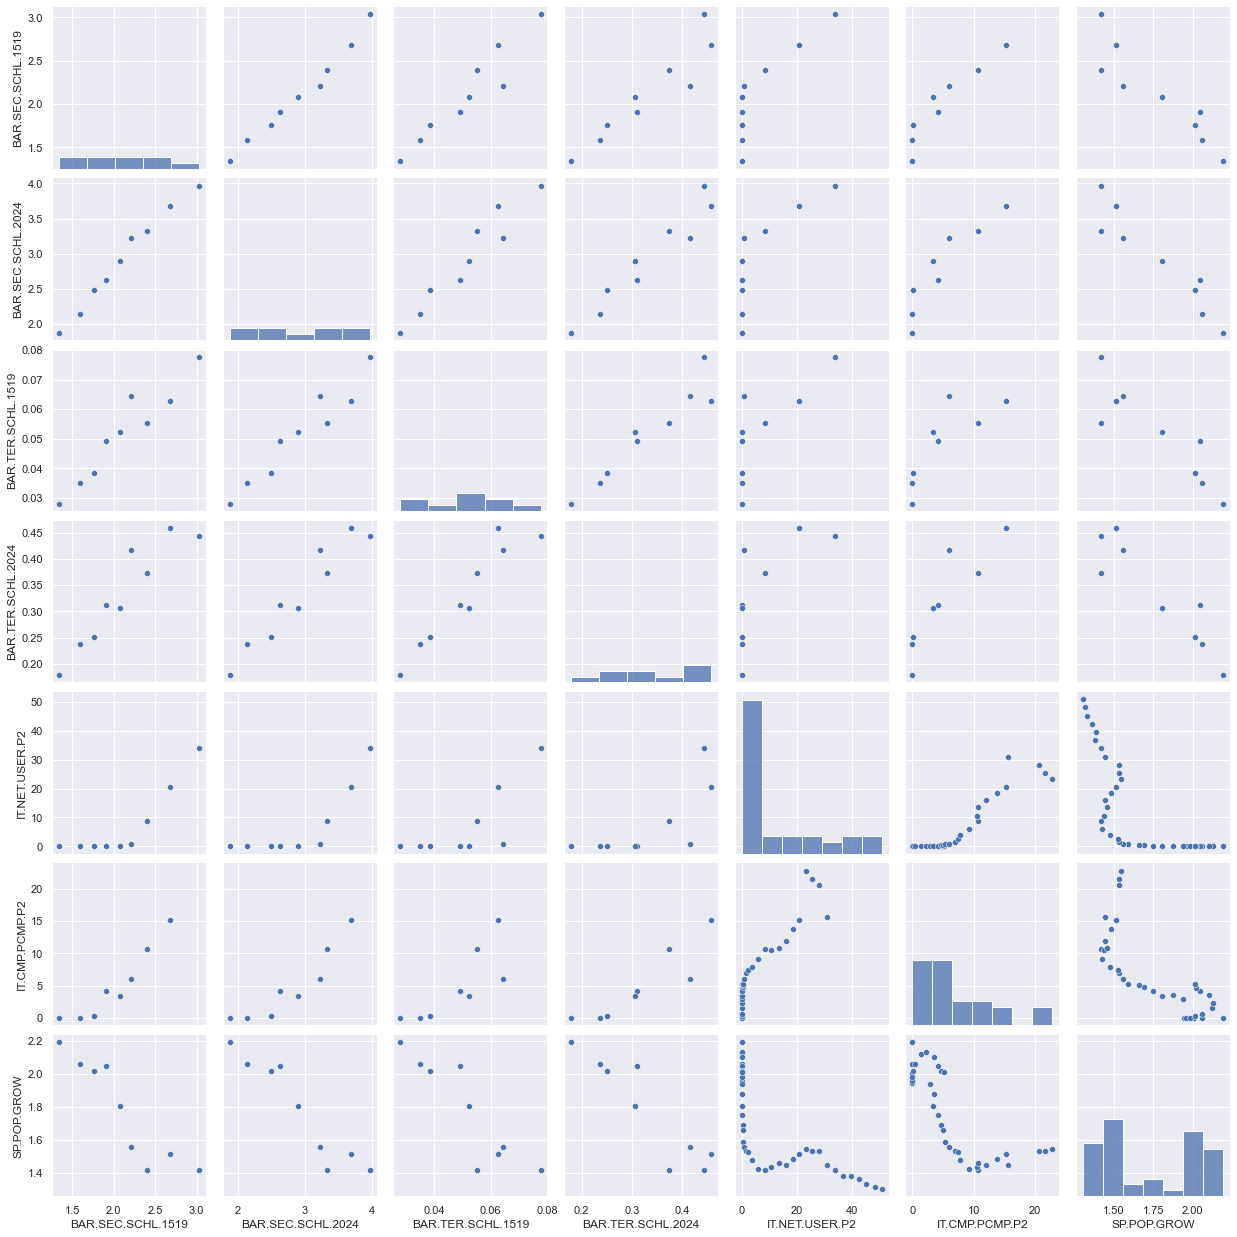

In [117]:
data_for_pairplot = year_series[['BAR.SEC.SCHL.1519','BAR.SEC.SCHL.2024','BAR.TER.SCHL.1519','BAR.TER.SCHL.2024','IT.NET.USER.P2','IT.CMP.PCMP.P2','SP.POP.GROW']].loc[:'2020']

sns_plot = sns.pairplot(data_for_pairplot)

<AxesSubplot:xlabel='Indicator Code', ylabel='Indicator Code'>

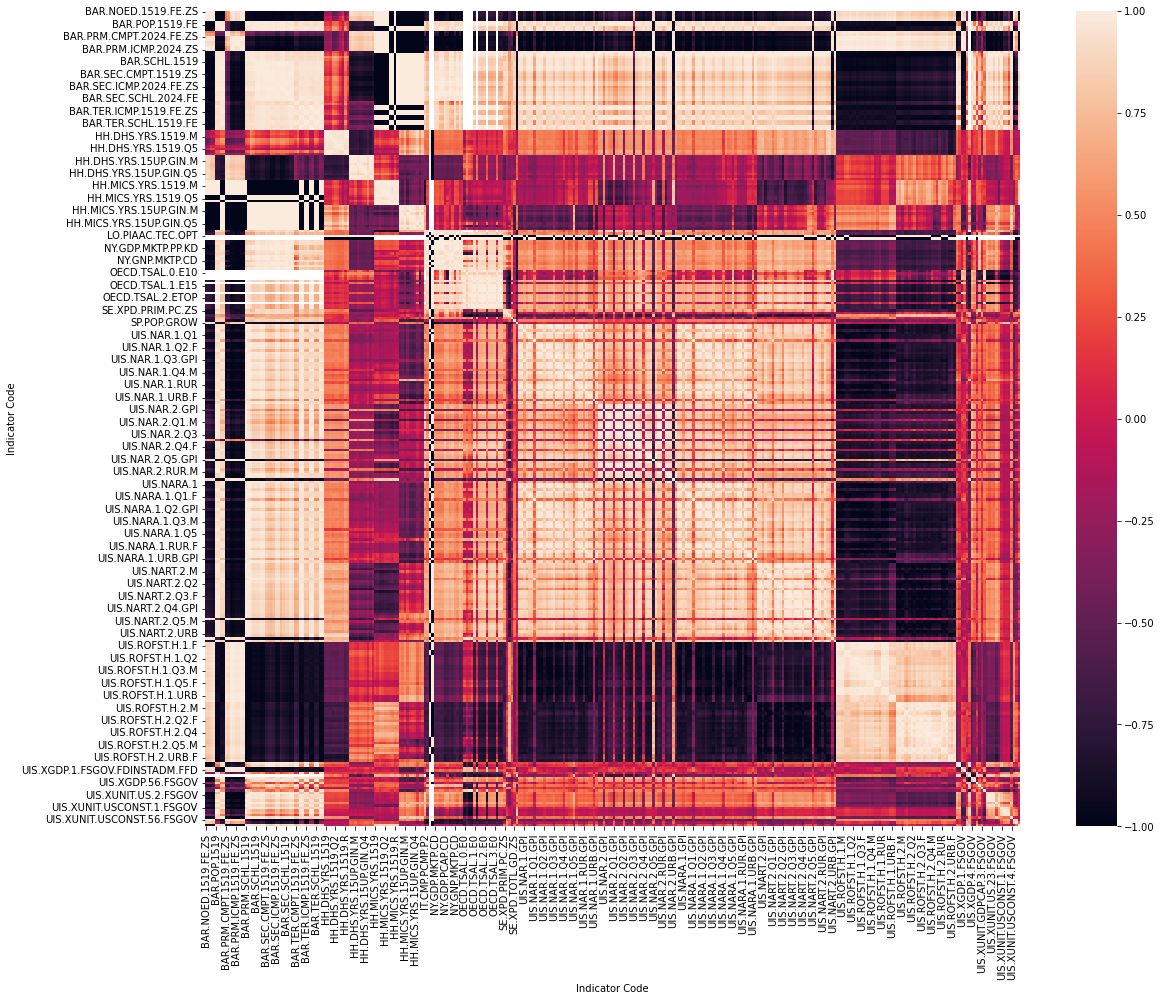

In [110]:
fig, ax = plt.subplots(figsize=(20,15))  
sns.heatmap(year_series.corr(),annot = False,square=True)

<AxesSubplot:xlabel='Indicator Code', ylabel='Indicator Code'>

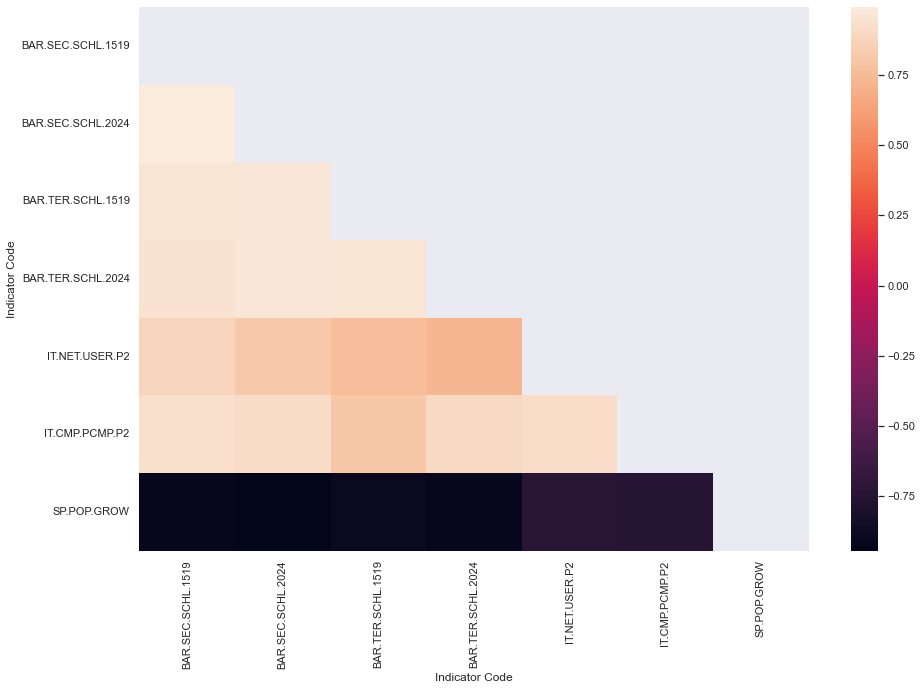

In [118]:
matrix = np.triu(year_series[['BAR.SEC.SCHL.1519','BAR.SEC.SCHL.2024','BAR.TER.SCHL.1519','BAR.TER.SCHL.2024','IT.NET.USER.P2','IT.CMP.PCMP.P2','SP.POP.GROW']].corr())
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(year_series[['BAR.SEC.SCHL.1519','BAR.SEC.SCHL.2024','BAR.TER.SCHL.1519','BAR.TER.SCHL.2024','IT.NET.USER.P2','IT.CMP.PCMP.P2','SP.POP.GROW']].corr(), annot=False, mask=matrix)

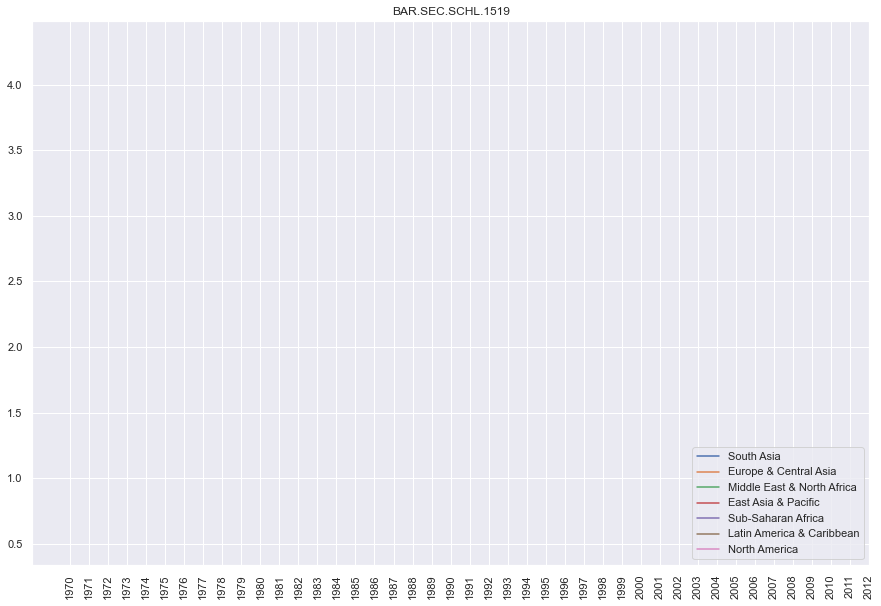

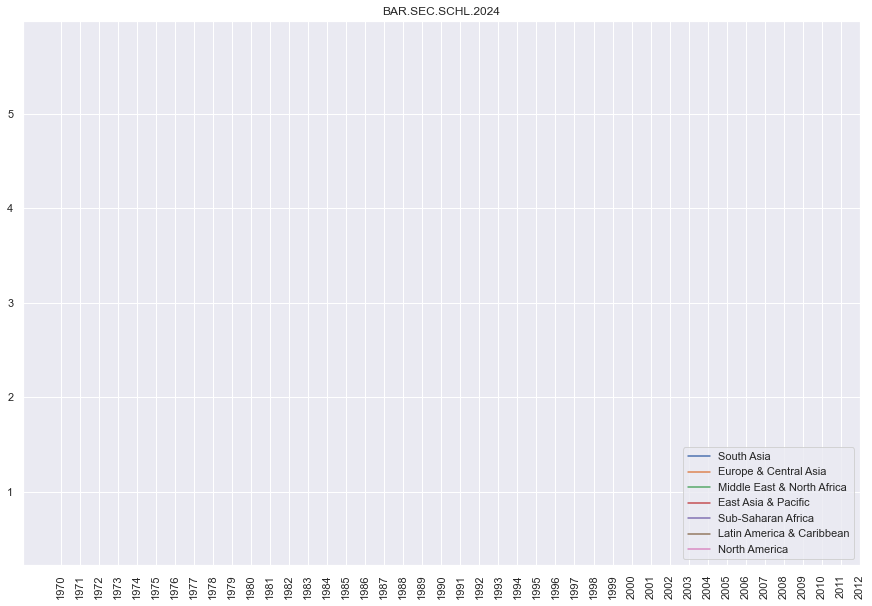

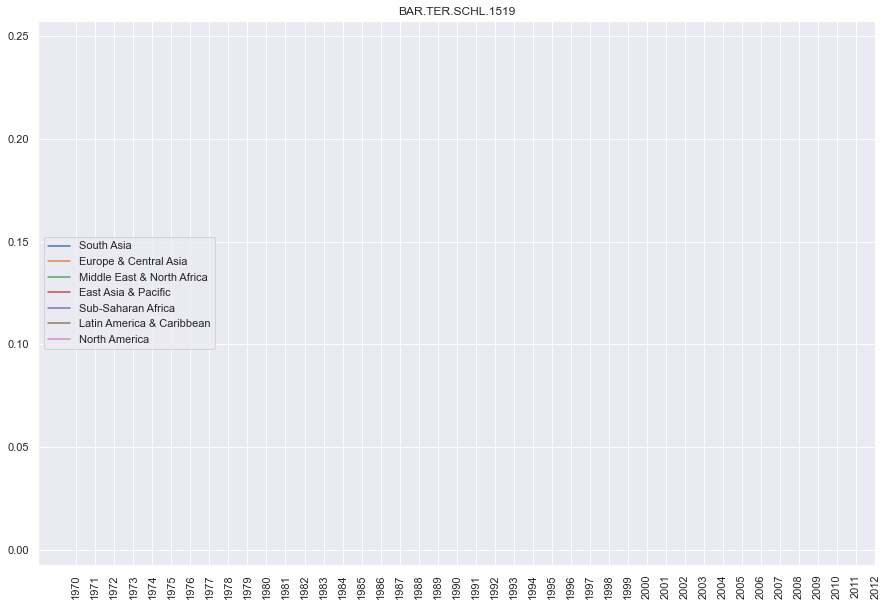

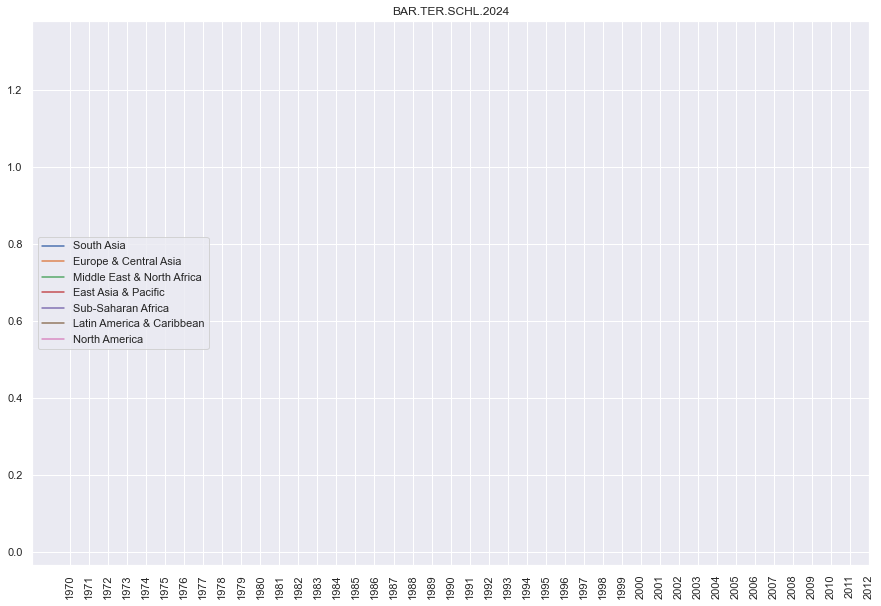

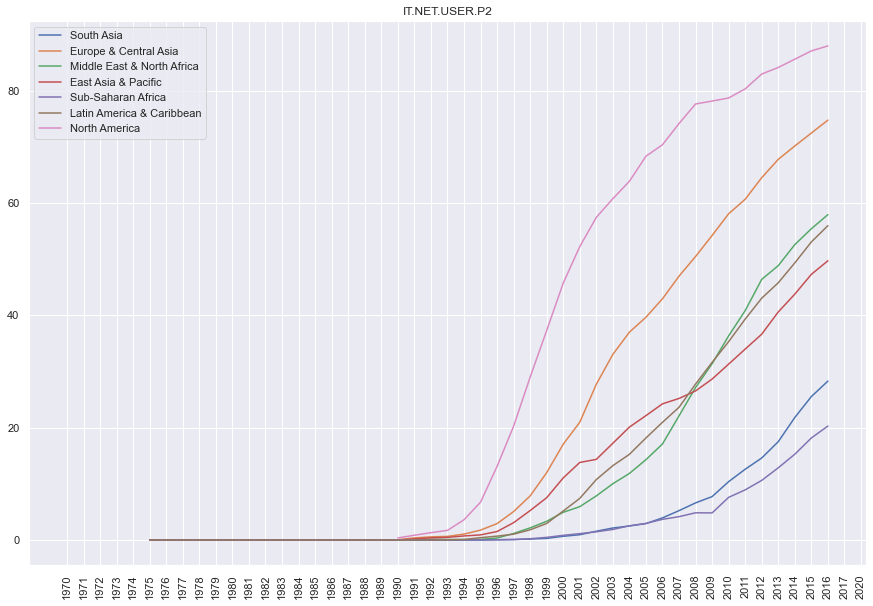

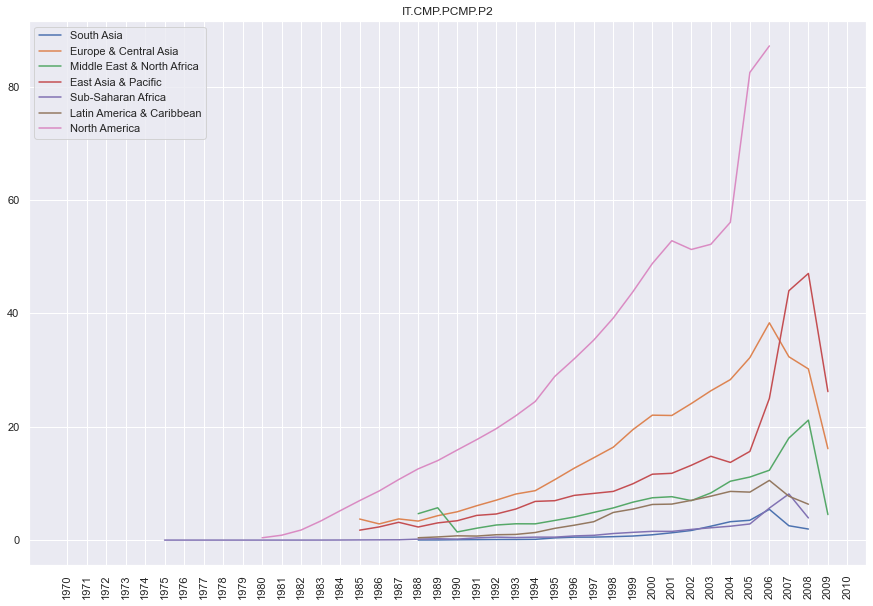

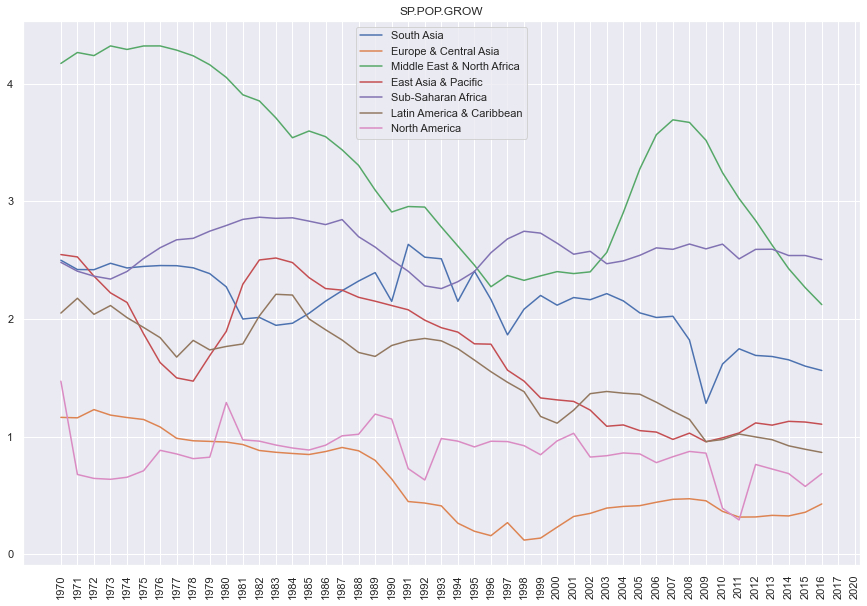

In [119]:
sns.set_theme()

indicators = ['BAR.SEC.SCHL.1519','BAR.SEC.SCHL.2024','BAR.TER.SCHL.1519','BAR.TER.SCHL.2024','IT.NET.USER.P2','IT.CMP.PCMP.P2','SP.POP.GROW']
for indicator in indicators:
    
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes()
    plt.title(indicator)
    degrees = 90
    plt.xticks(rotation=degrees)
    for region in final_dataset['Region'].dropna().unique():
        if len(golden_regions_var.loc[region,indicator].dropna())>0:
            ax.plot(golden_regions_var.loc[region,indicator], label=region)
            plt.legend()

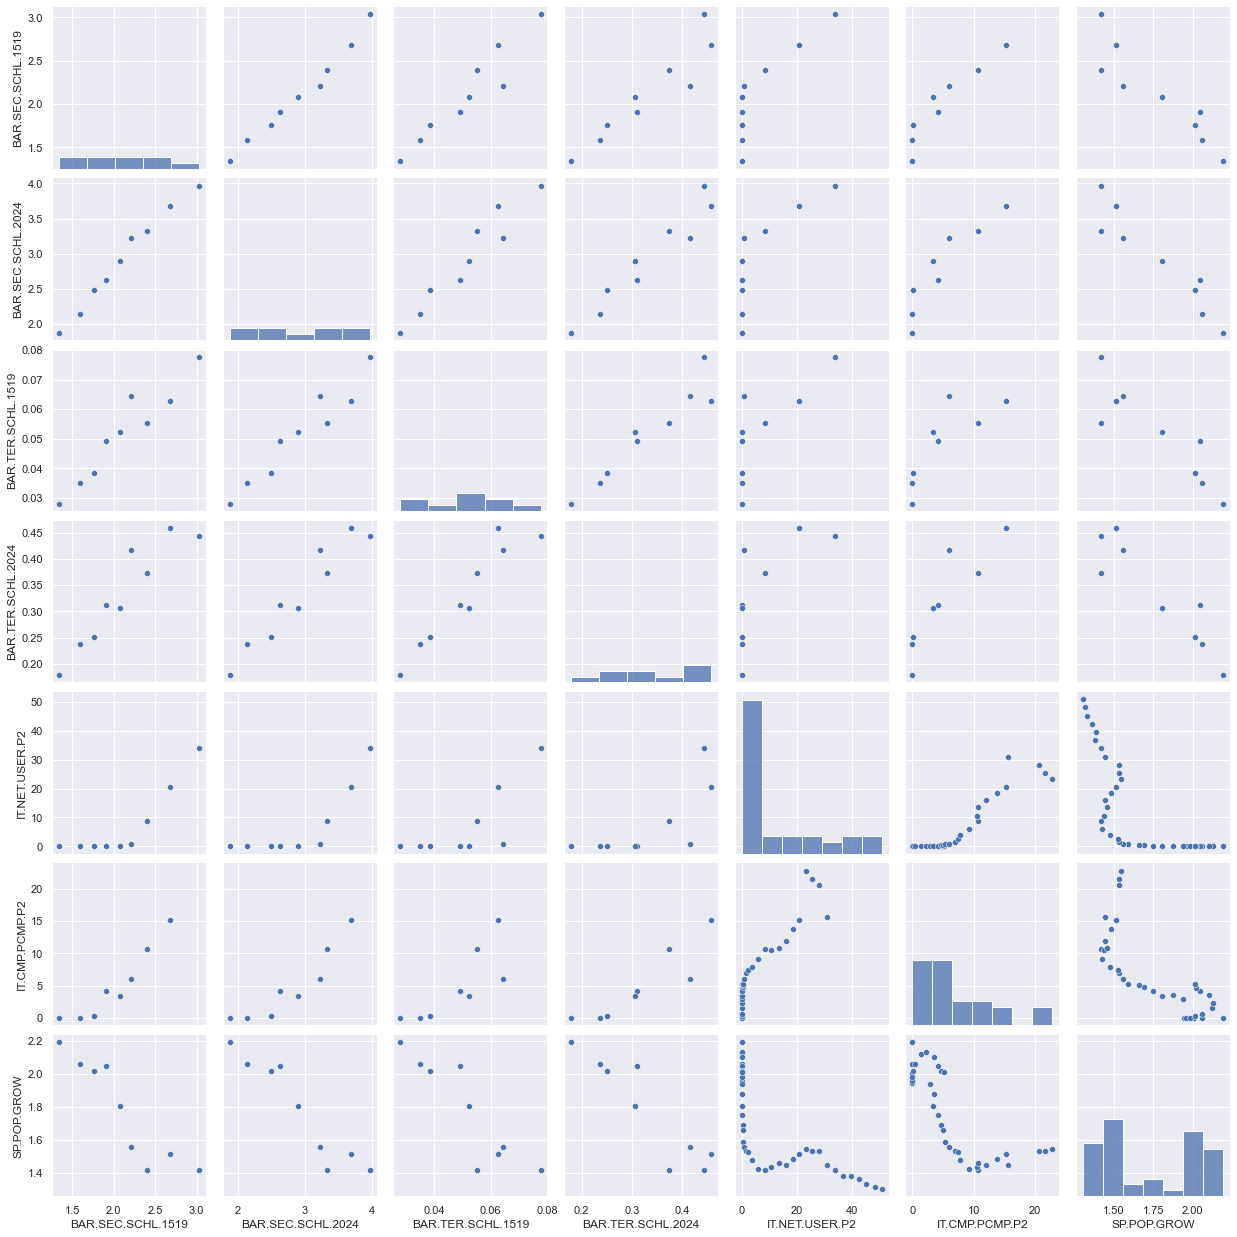

In [120]:
#sns.pairplot(year_series[['BAR.SEC.SCHL.1519','BAR.SEC.SCHL.2024','BAR.TER.SCHL.1519','BAR.TER.SCHL.2024','IT.NET.USER.P2','IT.CMP.PCMP.P2','SP.POP.GROW']])

In [122]:
countries_df = final_dataset.groupby(['Indicator Code','Country Name']).mean()
countries_df

1970  1971  1972  1973  1974  \
Indicator Code              Country Name                                       
BAR.NOED.1519.FE.ZS         Afghanistan         91.4   NaN   NaN   NaN   NaN   
                            Albania             26.6   NaN   NaN   NaN   NaN   
                            Algeria             69.7   NaN   NaN   NaN   NaN   
                            American Samoa       NaN   NaN   NaN   NaN   NaN   
                            Andorra              NaN   NaN   NaN   NaN   NaN   
...                                              ...   ...   ...   ...   ...   
XGDP.56.FSGOV.FDINSTADM.FFD West Bank and Gaza   NaN   NaN   NaN   NaN   NaN   
                            World                NaN   NaN   NaN   NaN   NaN   
                            Yemen, Rep.          NaN   NaN   NaN   NaN   NaN   
                            Zambia               NaN   NaN   NaN   NaN   NaN   
                            Zimbabwe             NaN   NaN   NaN   NaN   NaN   

                                                1975  1976  1977  1978  1979  \
Indicator Code              Country Name                                       
BAR.NOED.1519.FE.ZS         Afghanistan         88.8   NaN   NaN   NaN   NaN   
                            Albania             12.1   NaN   NaN   NaN   NaN   
                            Algeria             58.2   NaN   NaN   NaN   NaN   
                            American Samoa       NaN   NaN   NaN   NaN   NaN   
                            Andorra              NaN   NaN   NaN   NaN   NaN   
...                                              ...   ...   ...   ...   ...   
XGDP.56.FSGOV.FDINSTADM.FFD West Bank and Gaza   NaN   NaN   NaN   NaN   NaN   
                            World                NaN   NaN   NaN   NaN   NaN   
                            Yemen, Rep.          NaN   NaN   NaN   NaN   NaN   
                            Zambia               NaN   NaN   NaN   NaN   NaN   
                            Zimbabwe             NaN   NaN   NaN   NaN   NaN   

                                                1980  1981  1982  1983  1984  \
Indicator Code              Country Name                                       
BAR.NOED.1519.FE.ZS         Afghanistan         87.5   NaN   NaN   NaN   NaN   
                            Albania              3.7   NaN   NaN   NaN   NaN   
                            Algeria             50.0   NaN   NaN   NaN   NaN   
                            American Samoa       NaN   NaN   NaN   NaN   NaN   
                            Andorra              NaN   NaN   NaN   NaN   NaN   
...                                              ...   ...   ...   ...   ...   
XGDP.56.FSGOV.FDINSTADM.FFD West Bank and Gaza   NaN   NaN   NaN   NaN   NaN   
                            World                NaN   NaN   NaN   NaN   NaN   
                            Yemen, Rep.          NaN   NaN   NaN   NaN   NaN   
                            Zambia               NaN   NaN   NaN   NaN   NaN   
                            Zimbabwe             NaN   NaN   NaN   NaN   NaN   

                                                1985  1986  1987  1988  1989  \
Indicator Code              Country Name                                       
BAR.NOED.1519.FE.ZS         Afghanistan         85.5   NaN   NaN   NaN   NaN   
                            Albania              0.8   NaN   NaN   NaN   NaN   
                            Algeria             36.7   NaN   NaN   NaN   NaN   
                            American Samoa       NaN   NaN   NaN   NaN   NaN   
                            Andorra              NaN   NaN   NaN   NaN   NaN   
...                                              ...   ...   ...   ...   ...   
XGDP.56.FSGOV.FDINSTADM.FFD West Bank and Gaza   NaN   NaN   NaN   NaN   NaN   
                            World                NaN   NaN   NaN   NaN   NaN   
                            Yemen, Rep.          NaN   NaN   NaN   NaN   NaN   
                            Zambia           

In [127]:
scores = pd.DataFrame(countries_df.loc[['BAR.SEC.SCHL.1519','BAR.SEC.SCHL.2024','BAR.TER.SCHL.1519','BAR.TER.SCHL.2024','IT.NET.USER.P2','IT.CMP.PCMP.P2','SP.POP.GROW']].mean(axis=1).groupby(['Country Name']).mean(numeric_only=True))[0]
ranking_country = pd.DataFrame([scores.index,scores.values]).transpose()
ranking_country = ranking_country.sort_values(by=[1],ascending=False)
ranking_country.columns = ['Country','Score']
ranking_country.head(20)

,Country,Score
183,San Marino,38.2
125,Liechtenstein,35.1
22,Bermuda,34.1
148,Monaco,33.1
163,North America,26.6
37,Cayman Islands,26.1
4,Andorra,25.6
92,High income,23.6
150,Montenegro,22.1
81,Gibraltar,21.2


In [132]:
ranking_country.tail(20)

,Country,Score
34,Cambodia,1.0
123,Liberia,1.0
64,Eritrea,1.0
152,Mozambique,0.9
189,Sierra Leone,0.9
214,Tanzania,0.9
102,Isle of Man,0.9
113,Kosovo,0.9
134,Malawi,0.8
45,"Congo, Dem. Rep.",0.8


In [134]:
ranking_country.to_excel("ranking_country.xlsx")

In [133]:
golden_regions = final_dataset.groupby(['Region']).mean(numeric_only=True)

scores = pd.DataFrame(golden_regions.mean(axis=1).groupby(['Region']).mean(numeric_only=True))[0]
ranking_region = pd.DataFrame([scores.index,scores.values]).transpose()
ranking_region = ranking_region.sort_values(by=[1],ascending=False)
ranking_region.columns = ['Region','Score']
ranking_region

,Region,Score
4,North America,859548408799.8
0,East Asia & Pacific,84849451472.9
1,Europe & Central Asia,67432850192.5
5,South Asia,53693013973.4
3,Middle East & North Africa,28926542457.3
2,Latin America & Caribbean,23894167513.0
6,Sub-Saharan Africa,4635725323.2


In [135]:
ranking_region.to_excel("ranking_region.xlsx")

In [ ]:
#worldmap_chart = pygal.maps.world.World()
#worldmap_chart.title = 'Minimum deaths by capital punishement (source: Amnesty International)'
#worldmap_chart.add('In 2012', {
#  'af': 14,
# 'bd': 1,
#  'by': 3,
#  'cn': 1000,
#  'gm': 9,
#  'in': 1,
#  'ir': 314,
#  'iq': 129,
#  'jp': 7,
#  'kp': 6,
#  'pk': 1,
#  'ps': 6,
#  'sa': 79,
#  'so': 6,
#  'sd': 5,
#  'tw': 6,
#  'ae': 1,
#  'us': 43,
#  'ye': 28
#})
#worldmap_chart.render()

In [142]:
countries = final_dataset['Country Code'].unique()
#indicators = np.array(countries.loc[['BAR.SEC.SCHL.1519','BAR.SEC.SCHL.2024','BAR.TER.SCHL.1519','BAR.TER.SCHL.2024','IT.NET.USER.P2','IT.CMP.PCMP.P2','SP.POP.GROW']].sum(axis=1).groupby(['Country Name']).sum())
worldmap_chart = pmw.maps.world.World()
worldmap_chart.title = 'Score potentiel investisement par pays'
worldmap_chart.add(countries)#, indicators)
worldmap_chart.render()

AttributeError: module 'pygal_maps_world' has no attribute 'maps'

# Analyse 

In [ ]:
#country_df = country_df.drop(['Table Name','Long Name', 'National accounts reference year', 'Other groups', 'Alternative conversion factor', 'Unnamed: 31'], axis=1)

In [ ]:
#country_df.head(2)

In [ ]:
#country_df = country_df.rename(columns={'Country Code': 'CountryCode'})

In [ ]:
#country_df.head(1)

In [ ]:
#country_series_df = country_series_df.drop(['Unnamed: 3'], axis=1)

In [ ]:
#country_series_df.head(2)

In [ ]:
#data_df.head(2) #ne sera pas pris

In [ ]:
#footnote_df = footnote_df.drop(['Unnamed: 4'], axis=1)

In [ ]:
#footnote_df.head(2)

In [ ]:
#series_df = series_df[['Series Code','Topic', 'Short definition', 'Source']]

In [ ]:
#series_df.head(2)

In [ ]:
#series_df = series_df.rename(columns={'Series Code': 'SeriesCode'})

In [ ]:
#series_df.head(1)

# Faire fusion

In [ ]:
#academy_df1 = pd.merge(country_df, country_series_df, on="CountryCode")
#academy_df2 = pd.merge(footnote_df, series_df, on="SeriesCode")

In [ ]:
#academy_df1.head(1)

In [ ]:
#academy_df2.head(1)

In [ ]:
#academy_final_df = pd.merge(academy_df1, academy_df2, on="CountryCode")
#academy_final_df.head(2)

In [ ]:
#print(f'academy_final_df contient {academy_final_df.shape[0]} lignes et {academy_final_df.shape[1]} colonnes')

In [ ]:
#academy_final_df.isna().mean()*100

In [ ]:
#country_series_df.duplicated(keep=False).sum()

In [ ]:
#academy_final_df['Short Name'].value_counts()

In [ ]:
#academy_final_df['Short Name'].sort_values()

In [ ]:
#academy_final_df['Short Name'].value_counts(normalize=True).plot(kind='bar')
#plt.show()

In [ ]:
#academy_final_df['Region'].describe()

In [ ]:
#academy_final_df['Region'].value_counts()

In [ ]:
#academy_final_df['Region'].sort_values()

In [ ]:
#academy_final_df['Region'].value_counts(normalize=True).plot(kind='bar')
#plt.show()